
ROLE CATEGORIZATION SUMMARY

Data Scientist:
  • Total records: 1705
  • Unique role titles: 203
  • Sample roles: Data Scientist, Senior Data Scientist, Data Scientist II, Principal Data Scientist, Research Data Scientist

Data Analyst:
  • Total records: 775
  • Unique role titles: 139
  • Sample roles: Data Analyst, Senior Data Analyst, Junior Data Analyst, Sr. Data Analyst, Senior Data Analyst - Archimedes

Business Analyst:
  • Total records: 579
  • Unique role titles: 168
  • Sample roles: Business Analyst, Business Intelligence Analyst, Business Systems Analyst, Senior Business Analyst, Jr. Business Analyst

Uncategorized roles: 1382
Total categorized: 3059



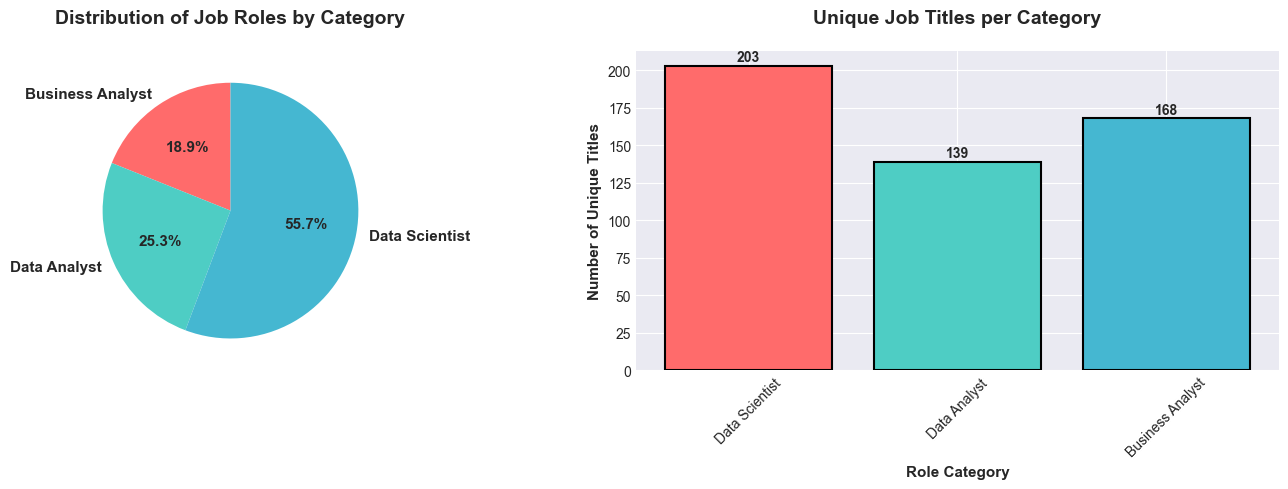

📊 Plot displayed: Role Categorization Distribution


ALIGNMENT ANALYSIS FOR: Data Scientist

🥇 Rank 1: Massachusetts Institute Of Technology (Sloan)
   Similarity Score: 52.47%
   Matching Skills: 5
   Top Skills: python, machine learning, r, optimization, deep learning

🥈 Rank 2: New York University (Stern)
   Similarity Score: 48.03%
   Matching Skills: 14
   Top Skills: python, machine learning, sql, r, optimization

🥉 Rank 3: University Of Texas Of Austin (Mccombs)
   Similarity Score: 44.47%
   Matching Skills: 11
   Top Skills: python, machine learning, r, optimization, scikit learn

   Rank 4: Carnegie Mellon University (Tepper)
   Similarity Score: 42.86%
   Matching Skills: 15
   Top Skills: python, machine learning, r, optimization, tableau

   Rank 5: Columbia University
   Similarity Score: 32.32%
   Matching Skills: 11
   Top Skills: python, machine learning, optimization, numpy, natural language processing


ALIGNMENT ANALYSIS FOR: Data Analyst

🥇 Rank 1: New York Univers

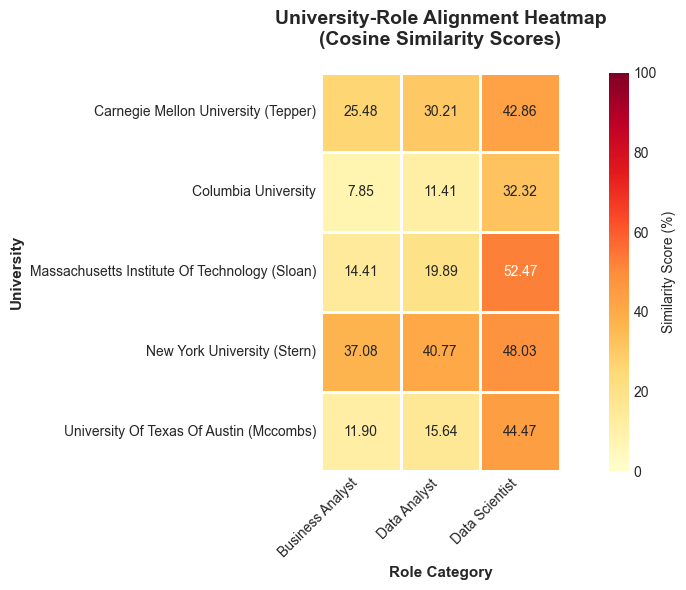

📊 Plot displayed: Similarity Heatmap


BEST UNIVERSITY FOR EACH ROLE

Data Scientist:
  🏆 Massachusetts Institute Of Technology (Sloan)
  Score: 52.47%
  Matching Skills: 5

Data Analyst:
  🏆 New York University (Stern)
  Score: 40.77%
  Matching Skills: 12

Business Analyst:
  🏆 New York University (Stern)
  Score: 37.08%
  Matching Skills: 10



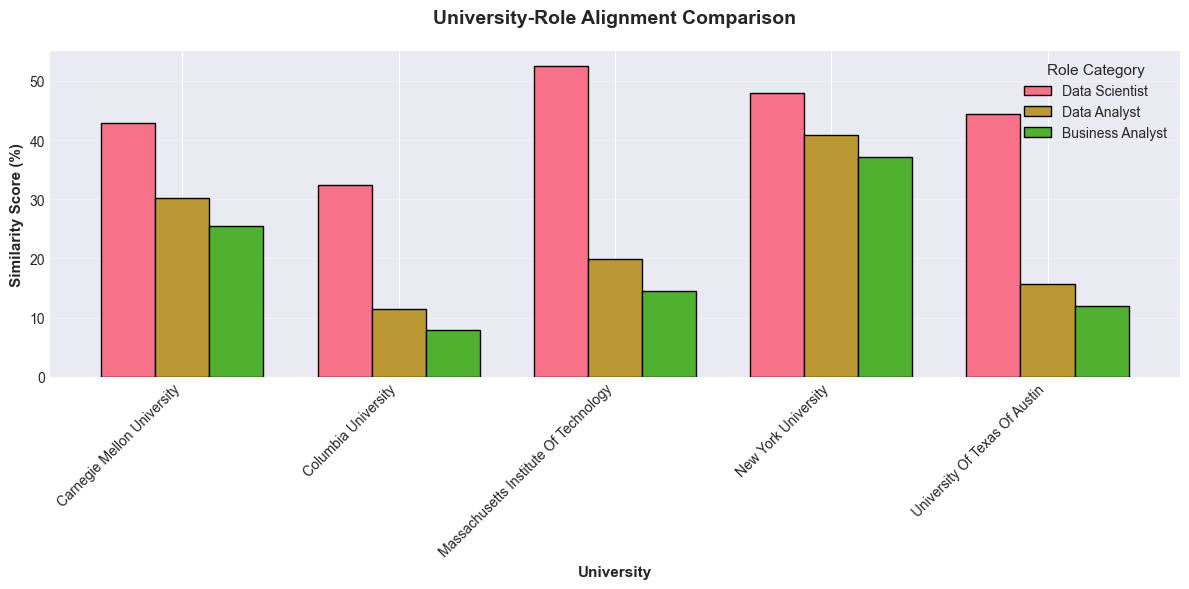

📊 Plot displayed: Similarity Comparison Bars



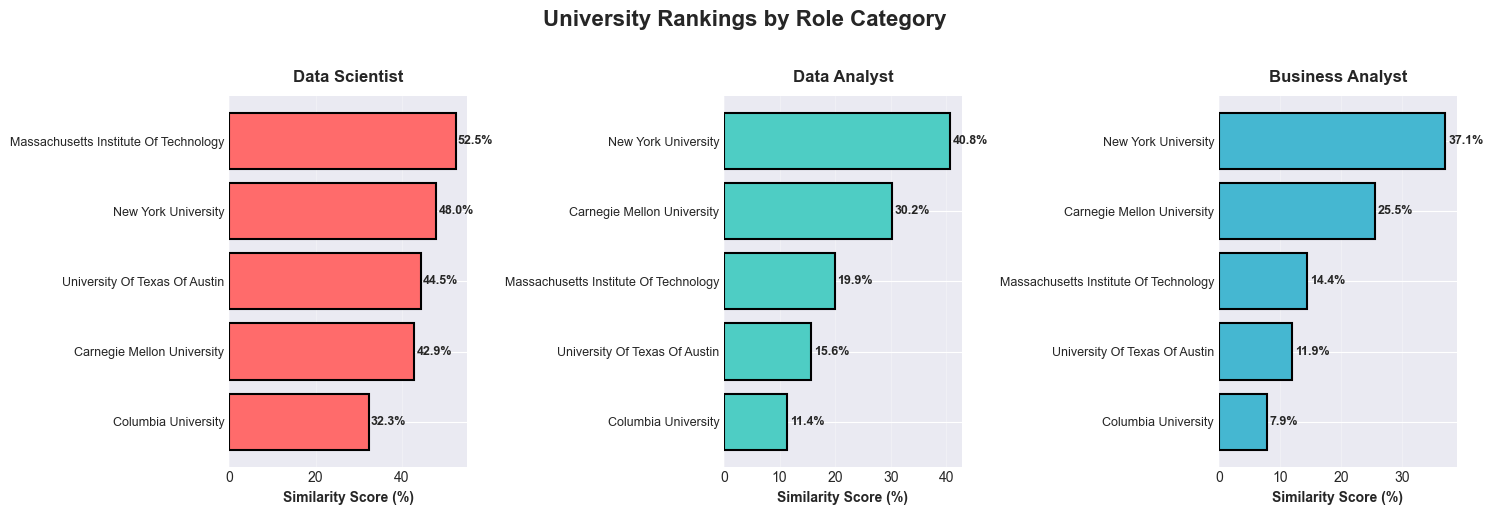

📊 Plot displayed: Rankings by Role


DETAILED SKILLS ANALYSIS


Data Scientist - Top 10 Required Skills:
  • python: 344 job postings
  • machine learning: 309 job postings
  • sql: 245 job postings
  • r: 198 job postings
  • optimization: 121 job postings
  • data visualization: 118 job postings
  • aws: 107 job postings
  • tableau: 95 job postings
  • azure: 80 job postings
  • scikit learn: 80 job postings

  Universities teaching these skills:
    Carnegie Mellon University (Tepper): 5/10 skills (50.0% coverage)
    Columbia University: 3/10 skills (30.0% coverage)
    Massachusetts Institute Of Technology (Sloan): 4/10 skills (40.0% coverage)
    New York University (Stern): 6/10 skills (60.0% coverage)
    University Of Texas Of Austin (Mccombs): 5/10 skills (50.0% coverage)


Data Analyst - Top 10 Required Skills:
  • sql: 186 job postings
  • excel: 147 job postings
  • power bi: 139 job postings
  • tableau: 113 job postings
  • data visualization: 98 job postings
  • python

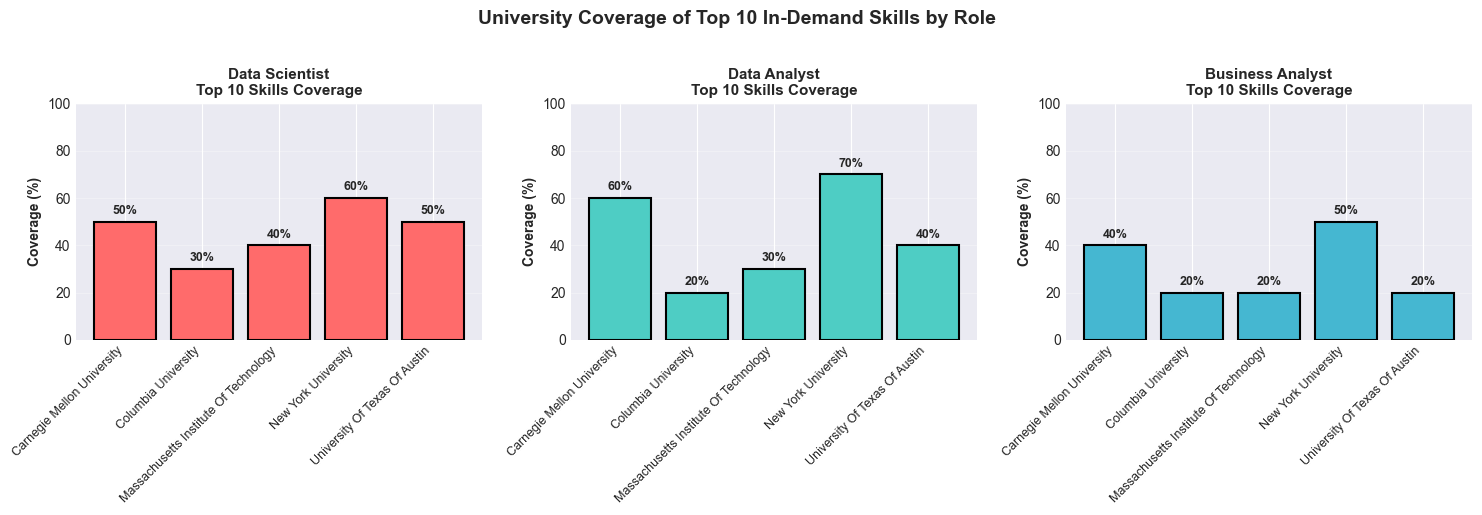

📊 Plot displayed: Skills Coverage Analysis



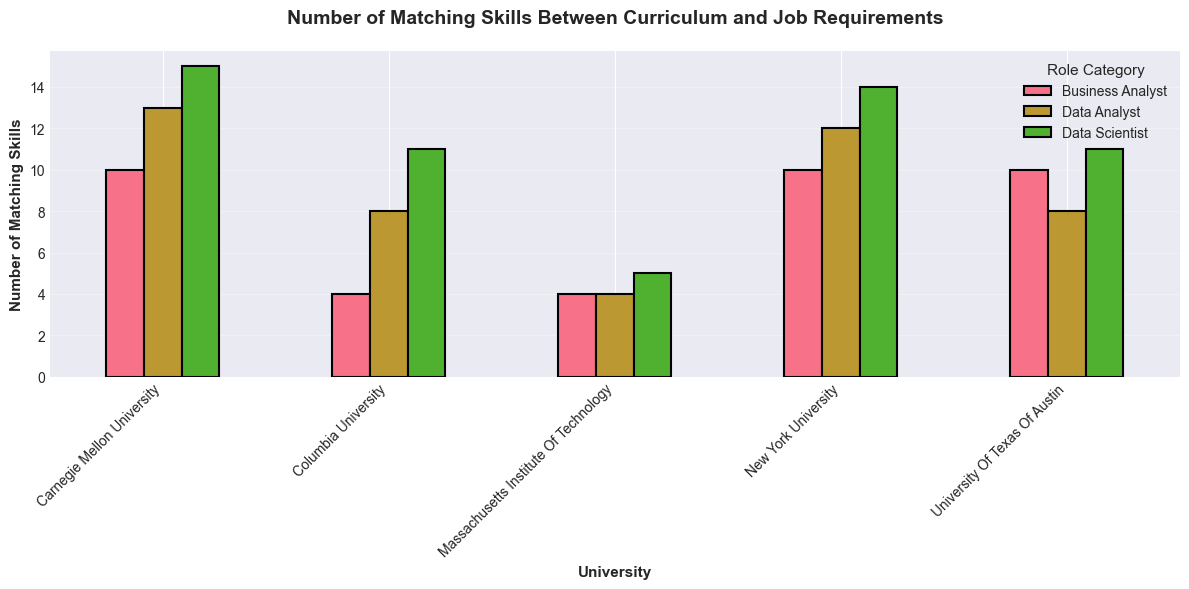

📊 Plot displayed: Matching Skills Comparison



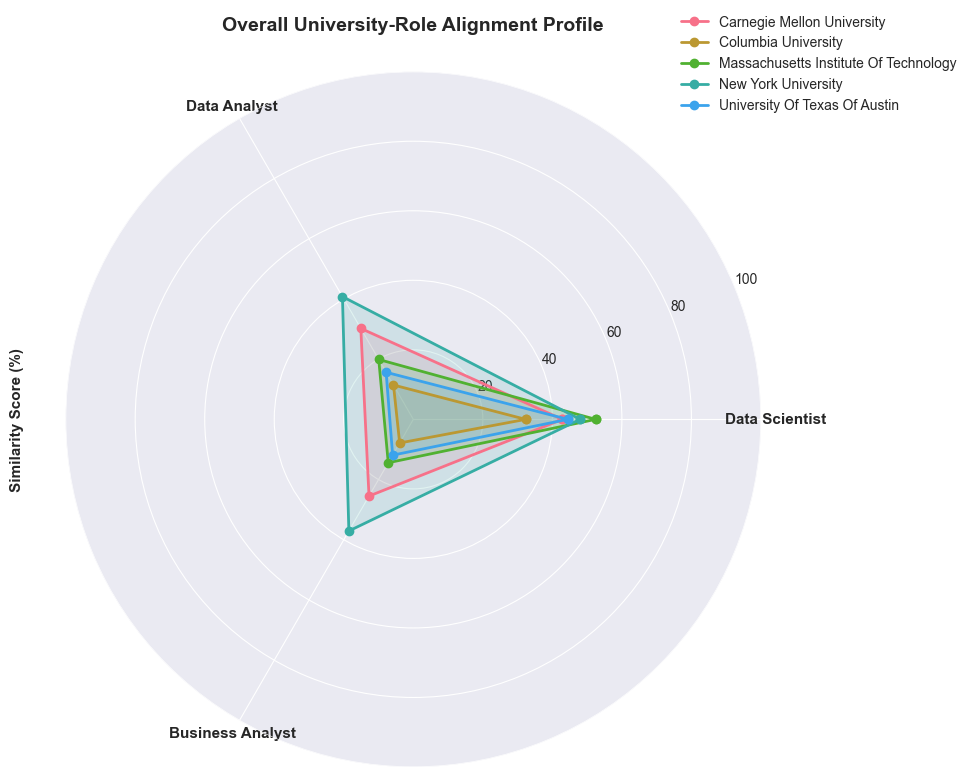

📊 Plot displayed: Alignment Radar Chart


ALL VISUALIZATIONS DISPLAYED!

📊 Displayed plots:
  1. Role Categorization Distribution - Role distribution and unique titles
  2. Similarity Heatmap - Heatmap of all similarity scores
  3. Similarity Comparison Bars - Grouped bar chart comparison
  4. Rankings by Role - Horizontal bar charts showing rankings
  5. Skills Coverage Analysis - Top 10 skills coverage by university
  6. Matching Skills Comparison - Number of matching skills
  7. Alignment Radar Chart - Overall alignment profile radar chart




In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Read the CSV files
curriculum_df = pd.read_csv('skills_from_curriculum.csv')
job_skills_df = pd.read_csv('step3_job_skills_by_role.csv')

# Function to normalize skill names for better matching
def normalize_skill(skill):
    """Normalize skill names by converting to lowercase and removing special characters"""
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

# Normalize skills in both dataframes
curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# Define role categories with keyword matching patterns
# Keywords are ordered by priority (more specific first)
role_categories = {
    'Data Scientist': ['data scientist', 'ds ', 'data science'],
    'Data Analyst': ['data analyst', 'data analysis'],
    'Business Analyst': ['business analyst', 'business intelligence analyst', 'bi analyst', 'business systems analyst']
}

# Create a category column for job roles using keyword matching
def categorize_role(role):
    """
    Categorize job role based on keyword matching.
    Uses priority-based matching to handle overlapping keywords.
    """
    role_lower = role.lower()
    
    # Check each category's keywords
    for category, keywords in role_categories.items():
        for keyword in keywords:
            if keyword in role_lower:
                return category
    return None

job_skills_df['role_category'] = job_skills_df['role'].apply(categorize_role)

# Print categorization statistics
print("\n" + "="*80)
print("ROLE CATEGORIZATION SUMMARY")
print("="*80 + "\n")

for category in role_categories.keys():
    count = len(job_skills_df[job_skills_df['role_category'] == category])
    unique_roles = job_skills_df[job_skills_df['role_category'] == category]['role'].nunique()
    print(f"{category}:")
    print(f"  • Total records: {count}")
    print(f"  • Unique role titles: {unique_roles}")
    
    # Show sample role titles
    sample_roles = job_skills_df[job_skills_df['role_category'] == category]['role'].unique()[:5]
    print(f"  • Sample roles: {', '.join(sample_roles)}")
    print()

uncategorized = len(job_skills_df[job_skills_df['role_category'].isna()])
print(f"Uncategorized roles: {uncategorized}")
print(f"Total categorized: {len(job_skills_df[job_skills_df['role_category'].notna()])}")
print()

# Plot 1: Role Categorization Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart for categorization distribution
category_counts = job_skills_df[job_skills_df['role_category'].notna()].groupby('role_category').size()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 11, 'weight': 'bold'})
ax1.set_title('Distribution of Job Roles by Category', fontsize=14, weight='bold', pad=20)

# Bar chart for unique role titles per category
unique_counts = []
for category in role_categories.keys():
    count = job_skills_df[job_skills_df['role_category'] == category]['role'].nunique()
    unique_counts.append(count)

ax2.bar(role_categories.keys(), unique_counts, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Unique Job Titles per Category', fontsize=14, weight='bold', pad=20)
ax2.set_ylabel('Number of Unique Titles', fontsize=11, weight='bold')
ax2.set_xlabel('Role Category', fontsize=11, weight='bold')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(unique_counts):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()
print("📊 Plot displayed: Role Categorization Distribution\n")

# Filter to only keep categorized roles
job_skills_df = job_skills_df[job_skills_df['role_category'].notna()]

# Get all unique skills across both datasets
all_skills = sorted(set(
    list(curriculum_df['skill_normalized'].unique()) + 
    list(job_skills_df['skill_normalized'].unique())
))

# Create university skill vectors
universities = curriculum_df['university'].unique()
university_vectors = {}

for uni in universities:
    uni_skills = curriculum_df[curriculum_df['university'] == uni]
    skill_vector = {}
    for skill in all_skills:
        count = uni_skills[uni_skills['skill_normalized'] == skill]['count'].sum()
        skill_vector[skill] = count
    university_vectors[uni] = skill_vector

# Create job role skill vectors (aggregated by category)
role_vectors = {}

for category in role_categories.keys():
    category_skills = job_skills_df[job_skills_df['role_category'] == category]
    skill_vector = {}
    for skill in all_skills:
        count = category_skills[category_skills['skill_normalized'] == skill]['count'].sum()
        skill_vector[skill] = count
    role_vectors[category] = skill_vector

# Convert dictionaries to matrices for cosine similarity calculation
def dict_to_vector(skill_dict, all_skills):
    """Convert skill dictionary to numpy array"""
    return np.array([skill_dict.get(skill, 0) for skill in all_skills])

# Calculate cosine similarity for each university-role combination
results = []

for role in role_categories.keys():
    role_vector = dict_to_vector(role_vectors[role], all_skills)
    
    print(f"\n{'='*80}")
    print(f"ALIGNMENT ANALYSIS FOR: {role}")
    print(f"{'='*80}\n")
    
    role_similarities = []
    
    for uni in universities:
        uni_vector = dict_to_vector(university_vectors[uni], all_skills)
        
        # Calculate cosine similarity
        similarity = cosine_similarity(
            uni_vector.reshape(1, -1), 
            role_vector.reshape(1, -1)
        )[0][0]
        
        # Find matching skills (both have non-zero values)
        matching_skills = [
            skill for skill in all_skills 
            if university_vectors[uni][skill] > 0 and role_vectors[role][skill] > 0
        ]
        
        # Get top matching skills by job demand
        top_skills = sorted(
            matching_skills,
            key=lambda s: role_vectors[role][s],
            reverse=True
        )[:5]
        
        role_similarities.append({
            'University': uni,
            'Role': role,
            'Similarity_Score': similarity * 100,
            'Matching_Skills_Count': len(matching_skills),
            'Top_Matching_Skills': ', '.join(top_skills) if top_skills else 'None'
        })
    
    # Sort by similarity score
    role_similarities = sorted(
        role_similarities, 
        key=lambda x: x['Similarity_Score'], 
        reverse=True
    )
    
    # Print rankings
    for rank, item in enumerate(role_similarities, 1):
        medal = '🥇' if rank == 1 else '🥈' if rank == 2 else '🥉' if rank == 3 else '  '
        print(f"{medal} Rank {rank}: {item['University']}")
        print(f"   Similarity Score: {item['Similarity_Score']:.2f}%")
        print(f"   Matching Skills: {item['Matching_Skills_Count']}")
        print(f"   Top Skills: {item['Top_Matching_Skills']}")
        print()
    
    results.extend(role_similarities)

# Create comprehensive results dataframe
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv('university_job_alignment_results.csv', index=False)
print(f"\nResults saved to 'university_job_alignment_results.csv'")

# Create summary pivot table
print(f"\n{'='*80}")
print("SUMMARY: Alignment Scores by University and Role")
print(f"{'='*80}\n")

pivot_table = results_df.pivot_table(
    values='Similarity_Score',
    index='University',
    columns='Role',
    aggfunc='first'
).round(2)

print(pivot_table)

# Plot 2: Heatmap of Similarity Scores
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Similarity Score (%)'}, 
            linewidths=2, linecolor='white',
            square=True, vmin=0, vmax=100)
plt.title('University-Role Alignment Heatmap\n(Cosine Similarity Scores)', 
          fontsize=14, weight='bold', pad=20)
plt.xlabel('Role Category', fontsize=11, weight='bold')
plt.ylabel('University', fontsize=11, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Similarity Heatmap\n")

# Find best university for each role
print(f"\n{'='*80}")
print("BEST UNIVERSITY FOR EACH ROLE")
print(f"{'='*80}\n")

for role in role_categories.keys():
    best = results_df[results_df['Role'] == role].sort_values(
        'Similarity_Score', 
        ascending=False
    ).iloc[0]
    print(f"{role}:")
    print(f"  🏆 {best['University']}")
    print(f"  Score: {best['Similarity_Score']:.2f}%")
    print(f"  Matching Skills: {best['Matching_Skills_Count']}")
    print()

# Plot 3: Grouped Bar Chart - Similarity Scores by Role
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(universities))
width = 0.25

for i, role in enumerate(role_categories.keys()):
    scores = [results_df[(results_df['University'] == uni) & 
                         (results_df['Role'] == role)]['Similarity_Score'].values[0] 
              for uni in universities]
    ax.bar(x + i*width, scores, width, label=role, edgecolor='black', linewidth=1)

ax.set_xlabel('University', fontsize=11, weight='bold')
ax.set_ylabel('Similarity Score (%)', fontsize=11, weight='bold')
ax.set_title('University-Role Alignment Comparison', fontsize=14, weight='bold', pad=20)
ax.set_xticks(x + width)
ax.set_xticklabels([uni.split('(')[0].strip() for uni in universities], rotation=45, ha='right')
ax.legend(title='Role Category', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Similarity Comparison Bars\n")

# Plot 4: Best University for Each Role (Visual Summary)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors_role = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (role, color) in enumerate(zip(role_categories.keys(), colors_role)):
    role_data = results_df[results_df['Role'] == role].sort_values('Similarity_Score', ascending=True)
    
    axes[idx].barh(range(len(role_data)), role_data['Similarity_Score'], 
                   color=color, edgecolor='black', linewidth=1.5)
    axes[idx].set_yticks(range(len(role_data)))
    axes[idx].set_yticklabels([uni.split('(')[0].strip() for uni in role_data['University']], fontsize=9)
    axes[idx].set_xlabel('Similarity Score (%)', fontsize=10, weight='bold')
    axes[idx].set_title(f'{role}', fontsize=12, weight='bold', pad=10)
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(role_data['Similarity_Score']):
        axes[idx].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9, weight='bold')

plt.suptitle('University Rankings by Role Category', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Rankings by Role\n")

# Create a detailed skills comparison
print(f"\n{'='*80}")
print("DETAILED SKILLS ANALYSIS")
print(f"{'='*80}\n")

for role in role_categories.keys():
    print(f"\n{role} - Top 10 Required Skills:")
    role_skills = sorted(
        [(skill, role_vectors[role][skill]) for skill in all_skills if role_vectors[role][skill] > 0],
        key=lambda x: x[1],
        reverse=True
    )[:10]
    
    for skill, count in role_skills:
        print(f"  • {skill}: {count} job postings")
    
    # Show which universities teach these top skills
    print(f"\n  Universities teaching these skills:")
    for uni in universities:
        taught_count = sum(1 for skill, _ in role_skills if university_vectors[uni][skill] > 0)
        coverage = (taught_count / len(role_skills)) * 100
        print(f"    {uni}: {taught_count}/{len(role_skills)} skills ({coverage:.1f}% coverage)")
    print()

# Plot 5: Skills Coverage Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, role in enumerate(role_categories.keys()):
    # Get top 10 skills for this role
    role_skills = sorted(
        [(skill, role_vectors[role][skill]) for skill in all_skills if role_vectors[role][skill] > 0],
        key=lambda x: x[1],
        reverse=True
    )[:10]
    
    # Calculate coverage for each university
    coverage_data = []
    for uni in universities:
        taught_count = sum(1 for skill, _ in role_skills if university_vectors[uni][skill] > 0)
        coverage_pct = (taught_count / len(role_skills)) * 100
        coverage_data.append(coverage_pct)
    
    axes[idx].bar(range(len(universities)), coverage_data, 
                  color=colors_role[idx], edgecolor='black', linewidth=1.5)
    axes[idx].set_xticks(range(len(universities)))
    axes[idx].set_xticklabels([uni.split('(')[0].strip() for uni in universities], 
                               rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Coverage (%)', fontsize=10, weight='bold')
    axes[idx].set_title(f'{role}\nTop 10 Skills Coverage', fontsize=11, weight='bold')
    axes[idx].set_ylim(0, 100)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(coverage_data):
        axes[idx].text(i, v + 2, f'{v:.0f}%', ha='center', va='bottom', fontsize=9, weight='bold')

plt.suptitle('University Coverage of Top 10 In-Demand Skills by Role', 
             fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Skills Coverage Analysis\n")

# Plot 6: Matching Skills Count Comparison
fig, ax = plt.subplots(figsize=(12, 6))
matching_pivot = results_df.pivot_table(
    values='Matching_Skills_Count',
    index='University',
    columns='Role',
    aggfunc='first'
)

matching_pivot.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.5)
ax.set_xlabel('University', fontsize=11, weight='bold')
ax.set_ylabel('Number of Matching Skills', fontsize=11, weight='bold')
ax.set_title('Number of Matching Skills Between Curriculum and Job Requirements', 
             fontsize=14, weight='bold', pad=20)
ax.set_xticklabels([uni.split('(')[0].strip() for uni in matching_pivot.index], 
                    rotation=45, ha='right')
ax.legend(title='Role Category', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Matching Skills Comparison\n")

# Plot 7: Radar Chart for Overall Alignment
from math import pi

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = [n / float(len(role_categories)) * 2 * pi for n in range(len(role_categories))]
angles += angles[:1]

for uni in universities:
    values = []
    for role in role_categories.keys():
        score = results_df[(results_df['University'] == uni) & 
                          (results_df['Role'] == role)]['Similarity_Score'].values[0]
        values.append(score)
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=uni.split('(')[0].strip())
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(role_categories.keys(), fontsize=11, weight='bold')
ax.set_ylim(0, 100)
ax.set_ylabel('Similarity Score (%)', fontsize=11, weight='bold', labelpad=30)
ax.set_title('Overall University-Role Alignment Profile', 
             fontsize=14, weight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
ax.grid(True)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Alignment Radar Chart\n")

print("\n" + "="*80)
print("ALL VISUALIZATIONS DISPLAYED!")
print("="*80)
print("\n📊 Displayed plots:")
print("  1. Role Categorization Distribution - Role distribution and unique titles")
print("  2. Similarity Heatmap - Heatmap of all similarity scores")
print("  3. Similarity Comparison Bars - Grouped bar chart comparison")
print("  4. Rankings by Role - Horizontal bar charts showing rankings")
print("  5. Skills Coverage Analysis - Top 10 skills coverage by university")
print("  6. Matching Skills Comparison - Number of matching skills")
print("  7. Alignment Radar Chart - Overall alignment profile radar chart")
print("\n")

# **Topic Modelling**

In [1]:
pip install bertopic sentence-transformers umap hdbscan


  Using cached bertopic-0.17.3-py3-none-any.whl.metadata (24 kB)
  Using cached sentence_transformers-5.1.2-py3-none-any.whl.metadata (16 kB)
  Using cached umap-0.1.1.tar.gz (3.2 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached umap_learn-0.5.9.post2-py3-none-any.whl.metadata (25 kB)
  Using cached transformers-4.57.1-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.36.0-py3-none-any.whl.metadata (14 kB)
  Using cached tokenizers-0.22.1-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.6.2-cp38-abi3-win_amd64.whl.metadata (4.1 kB)
  Using cached fsspec-2025.9.0-py3-none-any.whl.metadata (10 kB)
  Using cached pynndescent-0.5.13-py3-none-any.whl.metadata (6.8 kB)
Using cached bertopic-0.17.3-py3-none-any.whl (153 kB)
Using cached sentence_transformers-5.1.2-py3-none-any.whl (488 kB)
Using cached transformers-4.57.1-py3-none-any.whl (12.0 MB)
Using cached huggingface_hub-0.36.0

  DEPRECATION: Building 'umap' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'umap'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning,

In [3]:
pip install tf-keras

   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------------ --------------- 1.0/1.7 MB 16.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 9.2 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: C:\Users\kevin\anaconda3\envs\tf\python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
from bertopic import BERTopic

# Load your existing datasets
df_curriculum = pd.read_csv("MSBA-top5.csv")
df_jobs = pd.read_csv("cleaned_job_data.csv")

# Clean text (simple version)
def clean_text(text):
    import re
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df_curriculum['clean_text'] = df_curriculum['Curriculum'].apply(clean_text)
df_jobs['clean_text'] = df_jobs['final_job_description'].apply(clean_text)


In [12]:
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from hdbscan import HDBSCAN
from sklearn.base import BaseEstimator, TransformerMixin

# Custom passthrough dimensionality reduction
class IdentityDimReducer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X

# 1️⃣ Prepare text
texts = df_curriculum['clean_text'].dropna().tolist()

# 2️⃣ Generate BERT embeddings
embedder = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedder.encode(texts, show_progress_bar=True)

# 3️⃣ Build BERTopic model
cluster_model = HDBSCAN(
    min_cluster_size=2, 
    metric='euclidean',
    min_samples=1
)
representation_model = KeyBERTInspired()

topic_model_curr = BERTopic(
    language="english",
    embedding_model=embedder,  # ← ADD THIS! BERTopic needs the model
    umap_model=IdentityDimReducer(),  # passthrough instead of None
    hdbscan_model=cluster_model,
    representation_model=representation_model,
    calculate_probabilities=False,
    min_topic_size=2
)

# 4️⃣ Fit the model (still pass embeddings to avoid re-computing)
topics_curr, probs_curr = topic_model_curr.fit_transform(texts, embeddings)

# 5️⃣ Inspect results
topic_info_curr = topic_model_curr.get_topic_info()
print(topic_info_curr.head())

for topic_num in topic_info_curr['Topic'].head(5):
    print(f"\nTopic {topic_num}: {topic_model_curr.get_topic(topic_num)}")

Batches: 100%|███████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.70it/s]

   Topic  Count                                            Name  \
0     -1      5  -1_analytics_programming_decisionmaking_python   

                                      Representation  \
0  [analytics, programming, decisionmaking, pytho...   

                                 Representative_Docs  
0  [introduction to business analytics and ai  th...  

Topic -1: [('analytics', np.float32(0.5470754)), ('programming', np.float32(0.42785978)), ('decisionmaking', np.float32(0.39315197)), ('python', np.float32(0.39283505)), ('data', np.float32(0.378895)), ('statistics', np.float32(0.33853376)), ('regression', np.float32(0.336511)), ('learning', np.float32(0.3276214)), ('business', np.float32(0.3274463)), ('management', np.float32(0.32321537))]


In [13]:
topic_info_curr

,Topic,Count,Name,Representation,Representative_Docs
0,-1,5,-1_analytics_programming_decisionmaking_python,"[analytics, programming, decisionmaking, pytho...",[introduction to business analytics and ai th...


In [14]:
# --- BERTopic for Job Descriptions (Industry Data) ---

from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from hdbscan import HDBSCAN
from sklearn.base import BaseEstimator, TransformerMixin

# Custom passthrough dimensionality reduction
class IdentityDimReducer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X

# 1️⃣ Prepare text (cleaned job descriptions)
texts_jobs = df_jobs['clean_text'].dropna().tolist()

# 2️⃣ Generate BERT embeddings
embedder = SentenceTransformer("all-MiniLM-L6-v2")
embeddings_jobs = embedder.encode(texts_jobs, show_progress_bar=True)

# 3️⃣ Build BERTopic model (same structure as curriculum)
cluster_model = HDBSCAN(
    min_cluster_size=2,
    metric='euclidean',
    min_samples=1
)
representation_model = KeyBERTInspired()

topic_model_jobs = BERTopic(
    language="english",
    embedding_model=embedder,       # ensures consistent embedding space
    umap_model=IdentityDimReducer(),# bypass UMAP safely
    hdbscan_model=cluster_model,
    representation_model=representation_model,
    calculate_probabilities=False,
    min_topic_size=2
)

# 4️⃣ Fit the model (pass embeddings explicitly)
topics_jobs, probs_jobs = topic_model_jobs.fit_transform(texts_jobs, embeddings_jobs)

# 5️⃣ Inspect top topics
topic_info_jobs = topic_model_jobs.get_topic_info()
print("\n=== Top 5 Industry Job Topics ===")
print(topic_info_jobs.head(5))

# Display representative words for each topic
for topic_num in topic_info_jobs['Topic'].head(5):
    print(f"\nTopic {topic_num}: {topic_model_jobs.get_topic(topic_num)}")


Batches: 100%|█████████████████████████████████████████████████████████████████████████| 14/14 [00:13<00:00,  1.06it/s]



=== Top 5 Industry Job Topics ===
   Topic  Count                                    Name  \
0     -1    268    -1_sql_analytics_management_advanced   
1      0      8          0_enterprise_workflow_sql_ssrs   
2      1      7   1_workflow_pipeline_analytics_develop   
3      2      6          2_workplace_resume_hire_hiring   
4      3      6  3_management_staffing_workforce_manage   

                                      Representation  \
0  [sql, analytics, management, advanced, analyst...   
1  [enterprise, workflow, sql, ssrs, management, ...   
2  [workflow, pipeline, analytics, develop, progr...   
3  [workplace, resume, hire, hiring, cps, reemplo...   
4  [management, staffing, workforce, manage, anal...   

                                 Representative_Docs  
0  [national service group nationwide residential...  
1  [were looking hand business system analyst erp...  
2  [vanguards corporate service department seekin...  
3  [requisition id human service pembroke office ... 

In [15]:
topic_info_jobs

,Topic,Count,Name,Representation,Representative_Docs
0,-1,268,-1_sql_analytics_management_advanced,"[sql, analytics, management, advanced, analyst...",[national service group nationwide residential...
1,0,8,0_enterprise_workflow_sql_ssrs,"[enterprise, workflow, sql, ssrs, management, ...",[were looking hand business system analyst erp...
2,1,7,1_workflow_pipeline_analytics_develop,"[workflow, pipeline, analytics, develop, progr...",[vanguards corporate service department seekin...
3,2,6,2_workplace_resume_hire_hiring,"[workplace, resume, hire, hiring, cps, reemplo...",[requisition id human service pembroke office ...
4,3,6,3_management_staffing_workforce_manage,"[management, staffing, workforce, manage, anal...",[workforce analyst sr contract hr contract len...
...,...,...,...,...,...
58,57,2,57_workflow_sql_data_enterprise,"[workflow, sql, data, enterprise, automation, ...",[client looking python etl developer help desi...
59,58,2,58_analytics_advanced_data_consultant,"[analytics, advanced, data, consultant, expert...",[data science analytics ambitious data scienti...
60,59,2,59_report_deployment_building_build,"[report, deployment, building, build, data, cp...",[title sr data scientist year employment type ...
61,60,2,60_advanced_workflow_data_implementing,"[advanced, workflow, data, implementing, resea...",[summary seeking motivated data scientist rese...


In [16]:
import pandas as pd
from sentence_transformers import SentenceTransformer
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from hdbscan import HDBSCAN
from sklearn.base import BaseEstimator, TransformerMixin

# Passthrough UMAP substitute
class IdentityDimReducer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None): return self
    def transform(self, X): return X

# 1️⃣ Load skill datasets
curr_df = pd.read_csv("skills_from_curriculum.csv")
jobs_df = pd.read_csv("step3_job_skills_by_role.csv")

# 2️⃣ Prepare text (skill phrases)
texts_curr = curr_df['skill'].dropna().unique().tolist()
texts_jobs = jobs_df['job_skills'].dropna().unique().tolist()

# 3️⃣ Embed with MiniLM
embedder = SentenceTransformer("all-MiniLM-L6-v2")
emb_curr = embedder.encode(texts_curr, show_progress_bar=True)
emb_jobs = embedder.encode(texts_jobs, show_progress_bar=True)

# 4️⃣ Define a compact topic model
cluster_model = HDBSCAN(min_cluster_size=2, min_samples=1)
representation_model = KeyBERTInspired()

def run_topic_model(texts, embeddings, label):
    topic_model = BERTopic(
        language="english",
        embedding_model=embedder,
        umap_model=IdentityDimReducer(),
        hdbscan_model=cluster_model,
        representation_model=representation_model,
        calculate_probabilities=False,
        min_topic_size=2
    )
    topics, probs = topic_model.fit_transform(texts, embeddings)
    topic_info = topic_model.get_topic_info()
    print(f"\n\n=== Top {label} Topics ===")
    print(topic_info.head(10))
    for topic_num in topic_info['Topic'].head(5):
        print(f"\nTopic {topic_num}: {topic_model.get_topic(topic_num)}")
    return topic_info, topic_model

# 5️⃣ Run for curriculum and jobs
topic_info_curr, model_curr = run_topic_model(texts_curr, emb_curr, "Curriculum Skills")
topic_info_jobs, model_jobs = run_topic_model(texts_jobs, emb_jobs, "Job Skills")


Batches: 100%|███████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 42.27it/s]




=== Top Curriculum Skills Topics ===
   Topic  Count                                          Name  \
0     -1     13         -1_testing_excel_forecasting_computer   
1      0      5   0_statistical_statistics_bayesian_inference   
2      1      4                  1_data_engineering_bigquery_   
3      2      4  2_analytics_prescriptive_predictive_business   
4      3      4              3_data_machine_learning_analysis   
5      4      4                  4_pandas_scikit_python_learn   
6      5      3                       5_mysql_sql_postgresql_   
7      6      3                      6_hadoop_mapreduce_hive_   
8      7      2                             7_nosql_mongodb__   
9      8      2                              8_programming___   

                                      Representation  \
0  [testing, excel, forecasting, computer, valida...   
1  [statistical, statistics, bayesian, inference,...   
2        [data, engineering, bigquery, , , , , , , ]   
3  [analytics, prescr

In [17]:
topic_info_curr

,Topic,Count,Name,Representation,Representative_Docs
0,-1,13,-1_testing_excel_forecasting_computer,"[testing, excel, forecasting, computer, valida...","[time series, cross validation, dimensionality..."
1,0,5,0_statistical_statistics_bayesian_inference,"[statistical, statistics, bayesian, inference,...","[hypothesis testing, causal inference, statist..."
2,1,4,1_data_engineering_bigquery_,"[data, engineering, bigquery, , , , , , , ]","[data engineering, big data, data viz]"
3,2,4,2_analytics_prescriptive_predictive_business,"[analytics, prescriptive, predictive, business...","[predictive analytics, prescriptive analytics,..."
4,3,4,3_data_machine_learning_analysis,"[data, machine, learning, analysis, cluster, ,...","[cluster analysis, deep learning, machine lear..."
5,4,4,4_pandas_scikit_python_learn,"[pandas, scikit, python, learn, , , , , , ]","[numpy, python, scikit learn]"
6,5,3,5_mysql_sql_postgresql_,"[mysql, sql, postgresql, , , , , , , ]","[mysql, sql, postgresql]"
7,6,3,6_hadoop_mapreduce_hive_,"[hadoop, mapreduce, hive, , , , , , , ]","[hadoop, hive, mapreduce]"
8,7,2,7_nosql_mongodb__,"[nosql, mongodb, , , , , , , , ]","[nosql, mongodb]"
9,8,2,8_programming___,"[programming, , , , , , , , , ]","[optimization, linear programming]"


In [18]:
topic_info_jobs

,Topic,Count,Name,Representation,Representative_Docs
0,-1,22,-1_computer_feature_model_inference,"[computer, feature, model, inference, engineer...","[causal inference, computer vision, model inte..."
1,0,6,0_sql_oracle_mysql_sap,"[sql, oracle, mysql, sap, , , , , , ]","[sql, mssql, mysql]"
2,1,3,1_spark_pyspark_databricks_,"[spark, pyspark, databricks, , , , , , , ]","[spark, databricks, pyspark]"
3,2,3,2_scala_lambda_java_,"[scala, lambda, java, , , , , , , ]","[lambda, java, scala]"
4,3,3,3_data_visualization_dimensional_modeling,"[data, visualization, dimensional, modeling, ,...","[data visualization, dimensional modeling, dat..."
5,4,3,4_salesforce_aws__,"[salesforce, aws, , , , , , , , ]","[salesforce, aws, terraform]"
6,5,3,5_gcp_shap__,"[gcp, shap, , , , , , , , ]","[mip, shap, gcp]"
7,6,2,6_python_numpy__,"[python, numpy, , , , , , , , ]","[numpy, python]"
8,7,2,7_machine_learning__,"[machine, learning, , , , , , , , ]","[deep learning, machine learning]"
9,8,2,8____,"[, , , , , , , , , ]","[excel, vba]"


In [21]:
topic_info_jobs.iloc[4,4]

['data visualization', 'dimensional modeling', 'data modeling']

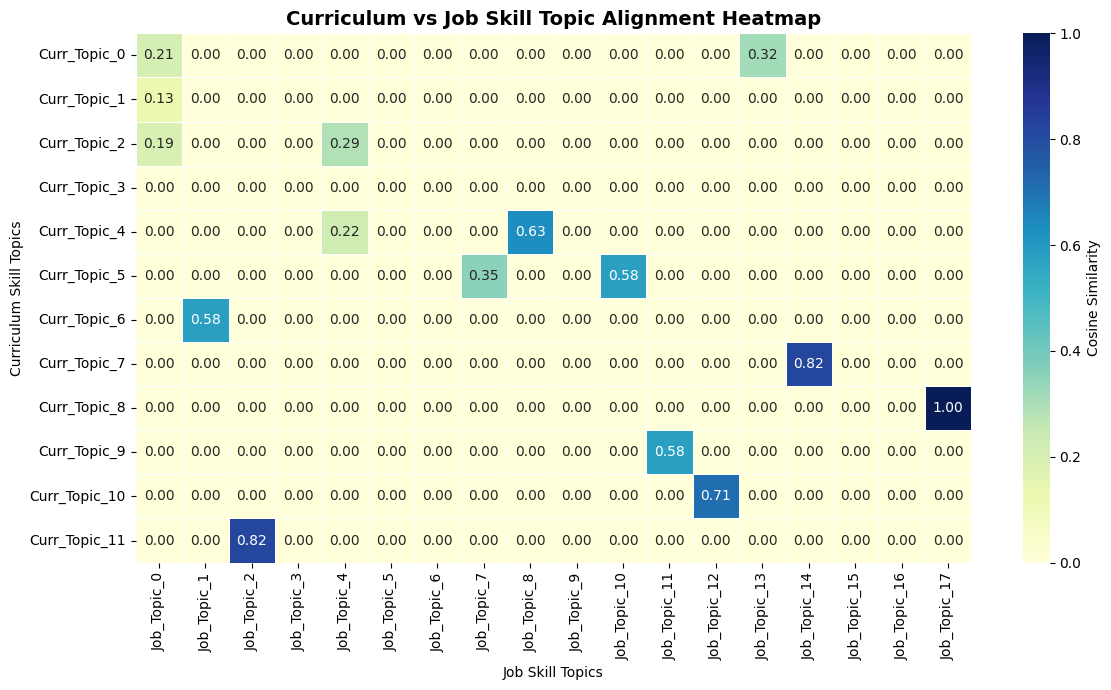


=== Top Curriculum–Job Topic Alignments ===
Curr_Topic_0 → Job_Topic_13 (Similarity: 0.32)
Curr_Topic_1 → Job_Topic_0 (Similarity: 0.13)
Curr_Topic_2 → Job_Topic_4 (Similarity: 0.29)
Curr_Topic_3 → Job_Topic_0 (Similarity: 0.00)
Curr_Topic_4 → Job_Topic_8 (Similarity: 0.63)
Curr_Topic_5 → Job_Topic_10 (Similarity: 0.58)
Curr_Topic_6 → Job_Topic_1 (Similarity: 0.58)
Curr_Topic_7 → Job_Topic_14 (Similarity: 0.82)
Curr_Topic_8 → Job_Topic_17 (Similarity: 1.00)
Curr_Topic_9 → Job_Topic_11 (Similarity: 0.58)
Curr_Topic_10 → Job_Topic_12 (Similarity: 0.71)
Curr_Topic_11 → Job_Topic_2 (Similarity: 0.82)

✅ Saved as 'curriculum_job_topic_alignment.csv'


In [23]:
# --- STEP 6: Compare Curriculum vs Job Topics Alignment ---

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Use the topic outputs you already generated:
# topic_info_curr from curriculum
# topic_info_jobs from job descriptions

# 1️⃣ Extract the representative skill words from each topic
curr_topics = {
    f"Curr_Topic_{i}": " ".join([w for w in topic_info_curr.iloc[i]['Representation'] if w])
    for i in range(len(topic_info_curr))
}

job_topics = {
    f"Job_Topic_{i}": " ".join([w for w in topic_info_jobs.iloc[i]['Representation'] if w])
    for i in range(len(topic_info_jobs))
}

# Convert to DataFrames
df_curr_topics = pd.DataFrame.from_dict(curr_topics, orient='index', columns=['skills'])
df_job_topics = pd.DataFrame.from_dict(job_topics, orient='index', columns=['skills'])

# 2️⃣ Combine all topics and create BoW embeddings
vectorizer = CountVectorizer(stop_words='english')
combined_texts = pd.concat([df_curr_topics, df_job_topics])
X = vectorizer.fit_transform(combined_texts['skills'])

# Split embeddings back into curriculum vs job
X_curr = X[:len(df_curr_topics)]
X_jobs = X[len(df_curr_topics):]

# 3️⃣ Compute cosine similarity (Curriculum vs Job topics)
similarity_matrix = cosine_similarity(X_curr, X_jobs)
alignment_df = pd.DataFrame(
    similarity_matrix,
    index=df_curr_topics.index,
    columns=df_job_topics.index
)

# 4️⃣ Visualize alignment heatmap
plt.figure(figsize=(12, 7))
sns.heatmap(alignment_df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Cosine Similarity'})
plt.title("Curriculum vs Job Skill Topic Alignment Heatmap", fontsize=14, weight='bold')
plt.xlabel("Job Skill Topics")
plt.ylabel("Curriculum Skill Topics")
plt.tight_layout()
plt.show()

# 5️⃣ Identify best matches
print("\n=== Top Curriculum–Job Topic Alignments ===")
for i in alignment_df.index:
    best_match = alignment_df.loc[i].idxmax()
    best_score = alignment_df.loc[i].max()
    print(f"{i} → {best_match} (Similarity: {best_score:.2f})")

# Optional: Save as CSV
alignment_df.to_csv("curriculum_job_topic_alignment.csv")
print("\n✅ Saved as 'curriculum_job_topic_alignment.csv'")


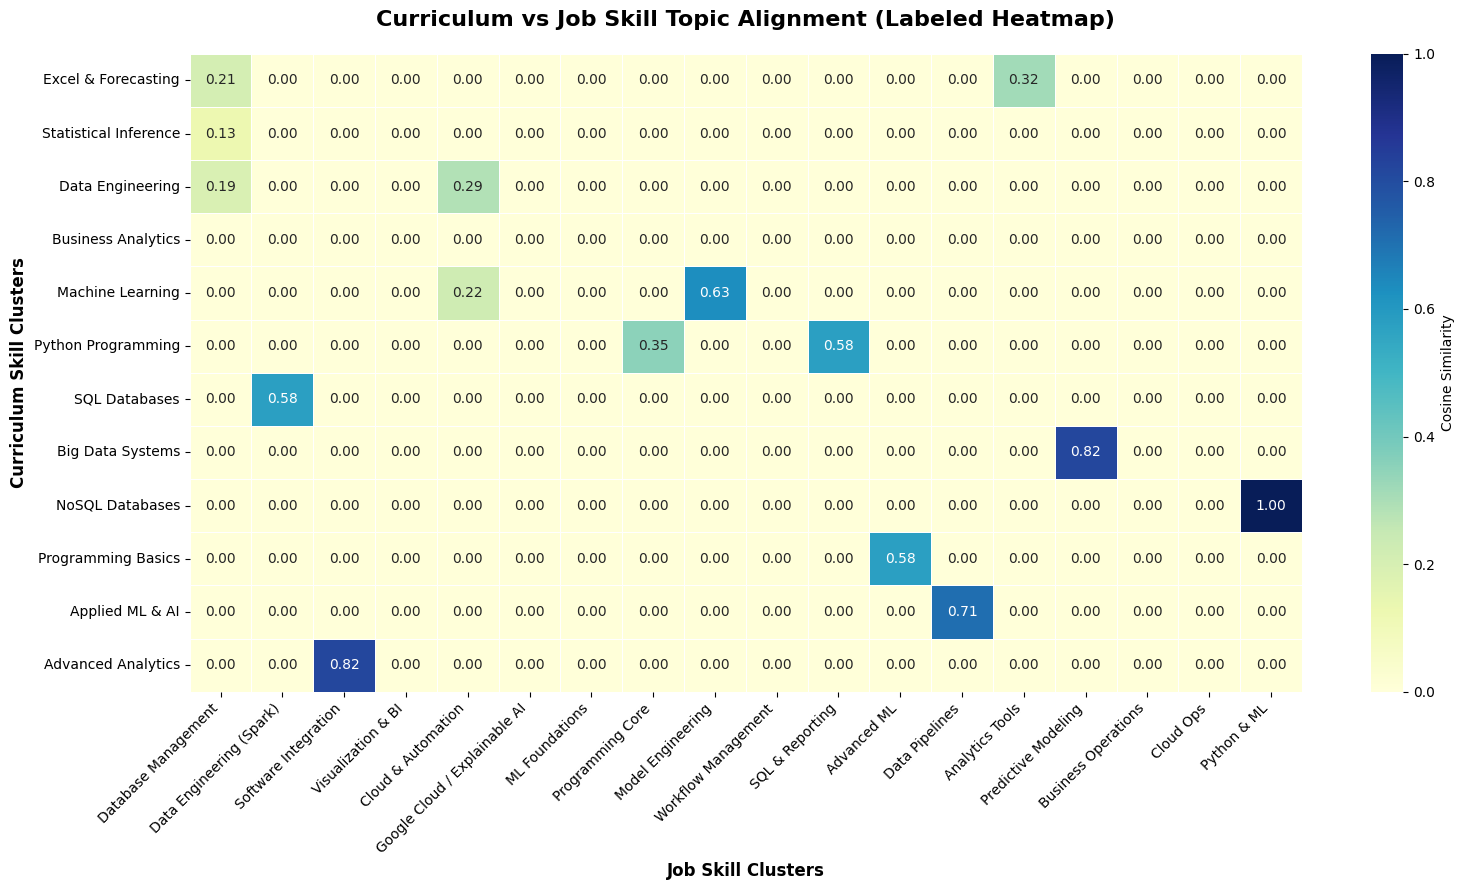

✅ Heatmap with descriptive topic labels displayed successfully!


In [24]:
# --- STEP 7: Labelled Curriculum vs Job Topic Alignment Heatmap ---

import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Define your interpreted topic names (based on your BERTopic analysis)
# 🔹 Update these manually based on your topics
curr_topic_labels = {
    "Curr_Topic_0": "Excel & Forecasting",
    "Curr_Topic_1": "Statistical Inference",
    "Curr_Topic_2": "Data Engineering",
    "Curr_Topic_3": "Business Analytics",
    "Curr_Topic_4": "Machine Learning",
    "Curr_Topic_5": "Python Programming",
    "Curr_Topic_6": "SQL Databases",
    "Curr_Topic_7": "Big Data Systems",
    "Curr_Topic_8": "NoSQL Databases",
    "Curr_Topic_9": "Programming Basics",
    "Curr_Topic_10": "Applied ML & AI",
    "Curr_Topic_11": "Advanced Analytics"
}

job_topic_labels = {
    "Job_Topic_0": "Database Management",
    "Job_Topic_1": "Data Engineering (Spark)",
    "Job_Topic_2": "Software Integration",
    "Job_Topic_3": "Visualization & BI",
    "Job_Topic_4": "Cloud & Automation",
    "Job_Topic_5": "Google Cloud / Explainable AI",
    "Job_Topic_6": "ML Foundations",
    "Job_Topic_7": "Programming Core",
    "Job_Topic_8": "Model Engineering",
    "Job_Topic_9": "Workflow Management",
    "Job_Topic_10": "SQL & Reporting",
    "Job_Topic_11": "Advanced ML",
    "Job_Topic_12": "Data Pipelines",
    "Job_Topic_13": "Analytics Tools",
    "Job_Topic_14": "Predictive Modeling",
    "Job_Topic_15": "Business Operations",
    "Job_Topic_16": "Cloud Ops",
    "Job_Topic_17": "Python & ML"
}

# 2️⃣ Rename axes in your alignment DataFrame
alignment_df_named = alignment_df.rename(index=curr_topic_labels, columns=job_topic_labels)

# 3️⃣ Plot heatmap with labels
plt.figure(figsize=(16, 9))
sns.heatmap(
    alignment_df_named, 
    annot=True, 
    cmap="YlGnBu", 
    fmt=".2f", 
    linewidths=0.5, 
    cbar_kws={'label': 'Cosine Similarity'}
)
plt.title("Curriculum vs Job Skill Topic Alignment (Labeled Heatmap)", fontsize=16, weight='bold', pad=20)
plt.xlabel("Job Skill Clusters", fontsize=12, weight='bold')
plt.ylabel("Curriculum Skill Clusters", fontsize=12, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("✅ Heatmap with descriptive topic labels displayed successfully!")


# **Top 5 US Universities**

In [31]:
# --- NEW STEP: Focused Comparison with Data Scientist Skill Profile ---

import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re

# Load datasets
curriculum_df = pd.read_csv('skills_from_curriculum.csv')
job_skills_df = pd.read_csv('step3_job_skills_by_role.csv')

# --- 1️⃣ Normalize Skills ---
def normalize_skill(skill):
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9\s]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# --- 2️⃣ Filter Data Scientist Roles ---
if 'role_category' in job_skills_df.columns:
    data_scientist_df = job_skills_df[job_skills_df['role_category'].str.lower() == 'data scientist']
else:
    # fallback: search for role titles containing 'data scientist'
    data_scientist_df = job_skills_df[job_skills_df['role'].str.lower().str.contains('data scientist', na=False)]

# --- 3️⃣ Combine all Data Scientist skills ---
data_scientist_skills = data_scientist_df['skill_normalized'].dropna().tolist()
data_scientist_skills = list(set(data_scientist_skills))  # remove duplicates

print(f"✅ Total unique Data Scientist skills collected: {len(data_scientist_skills)}")

# --- 4️⃣ Create combined vocabulary ---
all_skills = sorted(set(curriculum_df['skill_normalized'].unique()) | set(data_scientist_skills))

# --- 5️⃣ Build skill vectors ---
universities = curriculum_df['university'].unique()
university_vectors = {}

for uni in universities:
    uni_skills = curriculum_df[curriculum_df['university'] == uni]['skill_normalized'].tolist()
    uni_vector = np.array([1 if skill in uni_skills else 0 for skill in all_skills])
    university_vectors[uni] = uni_vector

# Data Scientist vector
data_scientist_vector = np.array([1 if skill in data_scientist_skills else 0 for skill in all_skills])

# --- 6️⃣ Compute Cosine Similarity ---
similarity_scores = {}
for uni, uni_vector in university_vectors.items():
    similarity = cosine_similarity([uni_vector], [data_scientist_vector])[0][0]
    similarity_scores[uni] = similarity

# --- 7️⃣ Save results ---
similarity_df = pd.DataFrame(list(similarity_scores.items()), columns=['University', 'Similarity_with_Data_Scientist'])
similarity_df = similarity_df.sort_values('Similarity_with_Data_Scientist', ascending=False)
print("\n=== Curriculum vs Data Scientist Skill Alignment ===")
print(similarity_df)

similarity_df.to_csv("DataScientist_Curriculum_Alignment.csv", index=False)
print("\n✅ Saved as 'DataScientist_Curriculum_Alignment.csv'")


✅ Total unique Data Scientist skills collected: 62

=== Curriculum vs Data Scientist Skill Alignment ===
                                      University  \
0            Carnegie Mellon University (Tepper)   
3                    New York University (Stern)   
1                            Columbia University   
4        University Of Texas Of Austin (Mccombs)   
2  Massachusetts Institute Of Technology (Sloan)   

   Similarity_with_Data_Scientist  
0                        0.388857  
3                        0.355600  
1                        0.320494  
4                        0.304851  
2                        0.211667  

✅ Saved as 'DataScientist_Curriculum_Alignment.csv'


In [32]:
data_scientist_skills

['causal inference',
 'glue',
 'lambda',
 'hive',
 'oracle',
 'nosql',
 'databricks',
 'bigquery',
 'git',
 'optimization',
 'sql',
 'hadoop',
 'pyspark',
 'scala',
 'docker',
 'sklearn',
 'terraform',
 'java',
 'computer vision',
 'tableau',
 'forecasting',
 'machine learning',
 'experimentation',
 'etl',
 'mongodb',
 'scikit learn',
 'time series',
 'tensorflow',
 'deep learning',
 'cassandra',
 'r',
 'mysql',
 'power bi',
 'statsmodels',
 'vba',
 'salesforce',
 'nlp',
 'erp',
 'kubernetes',
 'spark',
 'excel',
 'feature engineering',
 'data visualization',
 'azure',
 'postgresql',
 'mip',
 'numpy',
 'gcp',
 'sap',
 'aws',
 'airflow',
 'linear programming',
 'a b testing',
 'python',
 'snowflake',
 'pytorch',
 'crm',
 'elt',
 'data modeling',
 'mssql',
 'redshift',
 'natural language processing']

✅ Data Scientist skills collected: 62
✅ Data Analyst skills collected: 45
✅ Business Analyst skills collected: 30

=== Curriculum vs Data Scientist Skill Alignment ===
                                      University  \
0            Carnegie Mellon University (Tepper)   
3                    New York University (Stern)   
1                            Columbia University   
4        University Of Texas Of Austin (Mccombs)   
2  Massachusetts Institute Of Technology (Sloan)   

   Similarity_with_Data_Scientist  
0                        0.388857  
3                        0.355600  
1                        0.320494  
4                        0.304851  
2                        0.211667  
✅ Saved as 'Data_Scientist_Curriculum_Alignment.csv'

=== Curriculum vs Data Analyst Skill Alignment ===
                                      University  Similarity_with_Data_Analyst
0            Carnegie Mellon University (Tepper)                      0.395577
3                    New York University

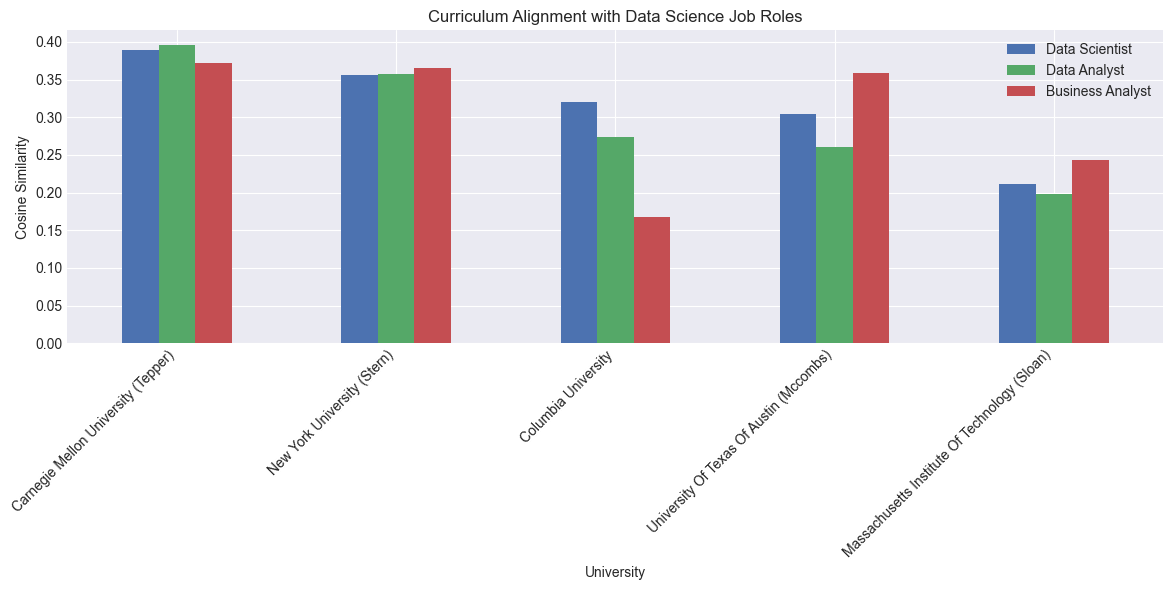

In [33]:
# --- Curriculum vs Job Skill Alignment for All Roles ---

import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Load data ---
curriculum_df = pd.read_csv('skills_from_curriculum.csv')
job_skills_df = pd.read_csv('step3_job_skills_by_role.csv')

# --- 1️⃣ Normalize skill names ---
def normalize_skill(skill):
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9\s]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# --- 2️⃣ Function to get filtered job skills for a role ---
def get_role_skills(df, role_name):
    role_name_lower = role_name.lower()
    if 'role_category' in df.columns:
        role_df = df[df['role_category'].str.lower() == role_name_lower]
    else:
        role_df = df[df['role'].str.lower().str.contains(role_name_lower, na=False)]
    
    skills = role_df['skill_normalized'].dropna().unique().tolist()
    return list(set(skills))  # remove duplicates

# --- 3️⃣ Extract skills for each role ---
data_scientist_skills = get_role_skills(job_skills_df, 'Data Scientist')
data_analyst_skills = get_role_skills(job_skills_df, 'Data Analyst')
business_analyst_skills = get_role_skills(job_skills_df, 'Business Analyst')

print(f"✅ Data Scientist skills collected: {len(data_scientist_skills)}")
print(f"✅ Data Analyst skills collected: {len(data_analyst_skills)}")
print(f"✅ Business Analyst skills collected: {len(business_analyst_skills)}")

# --- 4️⃣ Create combined vocabulary ---
all_skills = sorted(set(
    list(curriculum_df['skill_normalized'].unique()) +
    data_scientist_skills + data_analyst_skills + business_analyst_skills
))

# --- 5️⃣ Build curriculum vectors for universities ---
universities = curriculum_df['university'].unique()
university_vectors = {}

for uni in universities:
    uni_skills = curriculum_df[curriculum_df['university'] == uni]['skill_normalized'].tolist()
    uni_vector = np.array([1 if skill in uni_skills else 0 for skill in all_skills])
    university_vectors[uni] = uni_vector

# --- 6️⃣ Function to compute similarity for a given role ---
def compute_similarity(role_skills, role_name):
    role_vector = np.array([1 if skill in role_skills else 0 for skill in all_skills])
    
    scores = {}
    for uni, uni_vector in university_vectors.items():
        sim = cosine_similarity([uni_vector], [role_vector])[0][0]
        scores[uni] = sim

    df = pd.DataFrame(list(scores.items()), columns=['University', f'Similarity_with_{role_name.replace(" ", "_")}'])
    df = df.sort_values(by=df.columns[1], ascending=False)
    
    # Save to CSV
    csv_name = f"{role_name.replace(' ', '_')}_Curriculum_Alignment.csv"
    df.to_csv(csv_name, index=False)
    
    print(f"\n=== Curriculum vs {role_name} Skill Alignment ===")
    print(df)
    print(f"✅ Saved as '{csv_name}'")
    
    return df

# --- 7️⃣ Run for all three roles ---
df_ds = compute_similarity(data_scientist_skills, 'Data Scientist')
df_da = compute_similarity(data_analyst_skills, 'Data Analyst')
df_ba = compute_similarity(business_analyst_skills, 'Business Analyst')

# --- 8️⃣ Combine for summary ---
summary_df = df_ds.merge(df_da, on='University').merge(df_ba, on='University')
summary_df.to_csv("AllRoles_Curriculum_Alignment.csv", index=False)

print("\n✅ Combined alignment saved as 'AllRoles_Curriculum_Alignment.csv'")

# --- 9️⃣ Optional Visualization ---
summary_df.plot(
    x='University', 
    kind='bar', 
    figsize=(12,6),
    title='Curriculum Alignment with Data Science Job Roles',
    color=['#4C72B0', '#55A868', '#C44E52']
)
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.legend(['Data Scientist', 'Data Analyst', 'Business Analyst'])
plt.tight_layout()
plt.show()



=== Composite Employability Index (Higher = Better Alignment) ===
                                      University  Avg_Similarity  \
1                    New York University (Stern)        0.359507   
0            Carnegie Mellon University (Tepper)        0.385704   
3        University Of Texas Of Austin (Mccombs)        0.307886   
2                            Columbia University        0.253877   
4  Massachusetts Institute Of Technology (Sloan)        0.217954   

   Coverage_Ratio  Weighted_Match  Employability_Index  
1        0.215385        0.498311             0.344031  
0        0.230769        0.404639             0.343011  
3        0.169231        0.294753             0.263663  
2        0.169231        0.202432             0.218194  
4        0.076923        0.225850             0.177224  

✅ Saved as 'Composite_Employability_Index.csv'


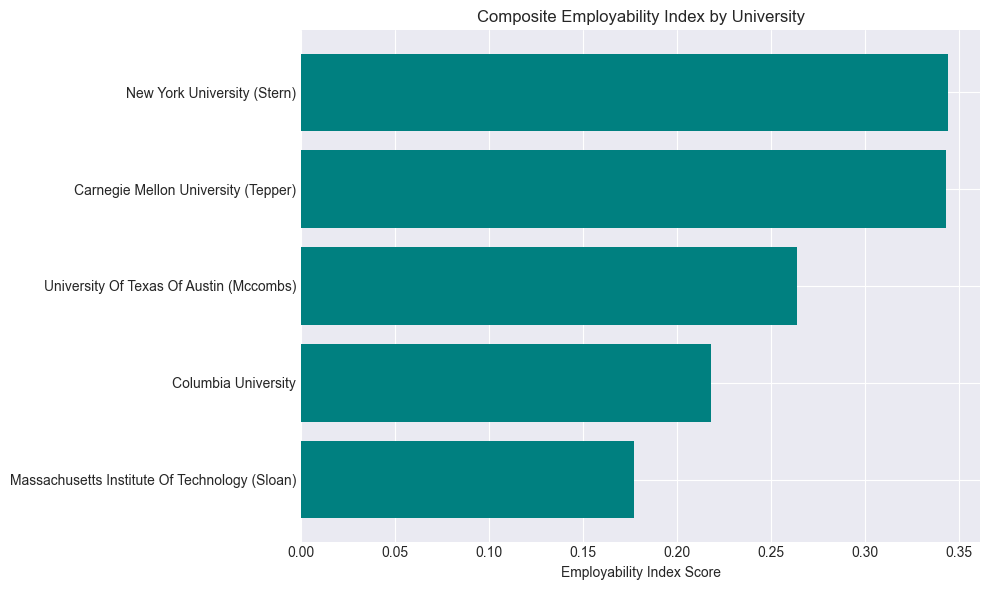

In [36]:
# --- Composite Employability Index Calculation ---

import pandas as pd
import numpy as np

# Load your combined alignment file (already created previously)
alignment_df = pd.read_csv("AllRoles_Curriculum_Alignment.csv")

# Load the curriculum and job skills data again
curriculum_df = pd.read_csv("skills_from_curriculum.csv")
job_skills_df = pd.read_csv("step3_job_skills_by_role.csv")

# Normalize skill names
import re
def normalize_skill(skill):
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9\s]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# --- Step 1️⃣: Combine all job skills and count frequency ---
skill_demand = job_skills_df['skill_normalized'].value_counts().reset_index()
skill_demand.columns = ['skill', 'count']

# --- Step 2️⃣: Compute Coverage Ratio and Weighted Demand Match ---
universities = curriculum_df['university'].unique()

coverage_data = []

for uni in universities:
    uni_skills = set(curriculum_df[curriculum_df['university'] == uni]['skill_normalized'])
    
    # Total job skills
    total_job_skills = set(skill_demand['skill'])
    
    # Coverage ratio (how many job skills the university teaches)
    coverage_ratio = len(uni_skills.intersection(total_job_skills)) / len(total_job_skills)
    
    # Weighted demand match (how many high-demand skills are covered, weighted by frequency)
    matched_skills = skill_demand[skill_demand['skill'].isin(uni_skills)]
    weighted_match = matched_skills['count'].sum() / skill_demand['count'].sum()
    
    coverage_data.append([uni, coverage_ratio, weighted_match])

coverage_df = pd.DataFrame(coverage_data, columns=['University', 'Coverage_Ratio', 'Weighted_Match'])

# --- Step 3️⃣: Merge with similarity scores ---
merged = alignment_df.merge(coverage_df, on='University', how='left')

# Compute average similarity across all three roles
merged['Avg_Similarity'] = merged[['Similarity_with_Data_Scientist', 
                                   'Similarity_with_Data_Analyst', 
                                   'Similarity_with_Business_Analyst']].mean(axis=1)

# --- Step 4️⃣: Calculate Employability Index ---
merged['Employability_Index'] = (
    0.5 * merged['Avg_Similarity'] +
    0.3 * merged['Coverage_Ratio'] +
    0.2 * merged['Weighted_Match']
)

# --- Step 5️⃣: Sort and Display ---
merged = merged.sort_values('Employability_Index', ascending=False)
print("\n=== Composite Employability Index (Higher = Better Alignment) ===")
print(merged[['University', 'Avg_Similarity', 'Coverage_Ratio', 'Weighted_Match', 'Employability_Index']])

# --- Step 6️⃣: Save to CSV ---
merged.to_csv("Composite_Employability_Index.csv", index=False)
print("\n✅ Saved as 'Composite_Employability_Index.csv'")

# --- Step 7️⃣: Visualization ---
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(merged['University'], merged['Employability_Index'], color='teal')
plt.xlabel("Employability Index Score")
plt.title("Composite Employability Index by University")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# NON - US


ROLE CATEGORIZATION SUMMARY

Data Scientist:
  • Total records: 1705
  • Unique role titles: 203
  • Sample roles: Data Scientist, Senior Data Scientist, Data Scientist II, Principal Data Scientist, Research Data Scientist

Data Analyst:
  • Total records: 775
  • Unique role titles: 139
  • Sample roles: Data Analyst, Senior Data Analyst, Junior Data Analyst, Sr. Data Analyst, Senior Data Analyst - Archimedes

Business Analyst:
  • Total records: 579
  • Unique role titles: 168
  • Sample roles: Business Analyst, Business Intelligence Analyst, Business Systems Analyst, Senior Business Analyst, Jr. Business Analyst

Uncategorized roles: 1382
Total categorized: 3059



<IPython.core.display.Javascript object>


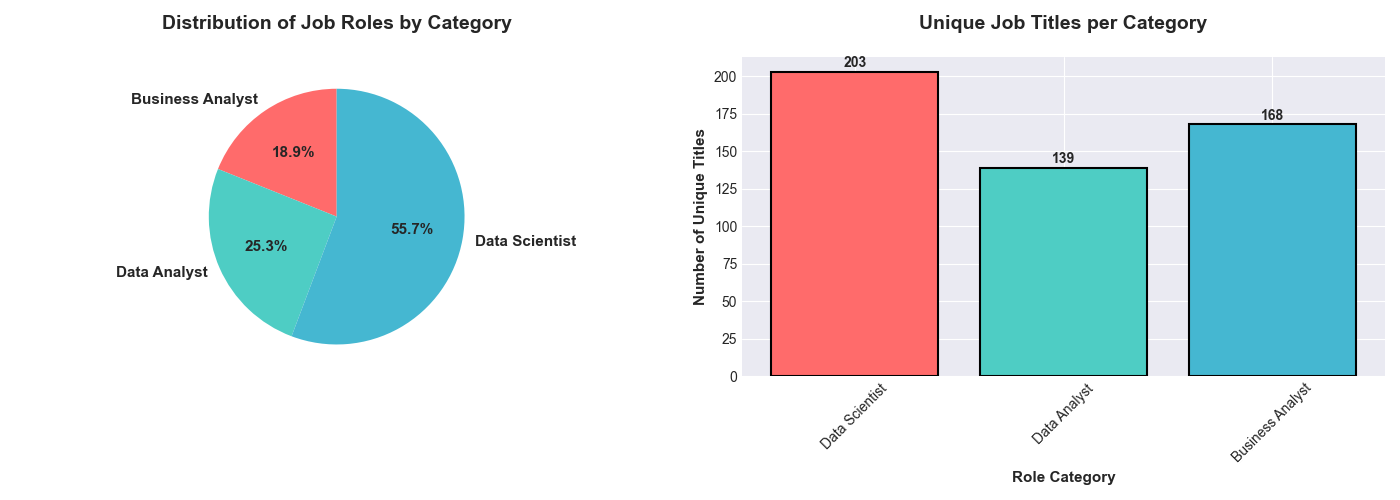

📊 Plot displayed: Role Categorization Distribution


ALIGNMENT ANALYSIS FOR: Data Scientist

🥇 Rank 1: Imperial Business School
   Similarity Score: 53.32%
   Matching Skills: 9
   Top Skills: python, machine learning, sql, r, tableau

🥈 Rank 2: London Business School
   Similarity Score: 50.41%
   Matching Skills: 6
   Top Skills: python, machine learning, sql, r, tableau

🥉 Rank 3: Warwick Business School
   Similarity Score: 28.82%
   Matching Skills: 3
   Top Skills: machine learning, tableau, forecasting

   Rank 4: Nus Business School
   Similarity Score: 21.05%
   Matching Skills: 3
   Top Skills: machine learning, deep learning, computer vision

   Rank 5: Melbourne Business School
   Similarity Score: 19.99%
   Matching Skills: 6
   Top Skills: machine learning, time series, experimentation, natural language processing, linear programming


ALIGNMENT ANALYSIS FOR: Data Analyst

🥇 Rank 1: London Business School
   Similarity Score: 36.97%
   Matching Skills: 6
   Top Skills: sq

<IPython.core.display.Javascript object>


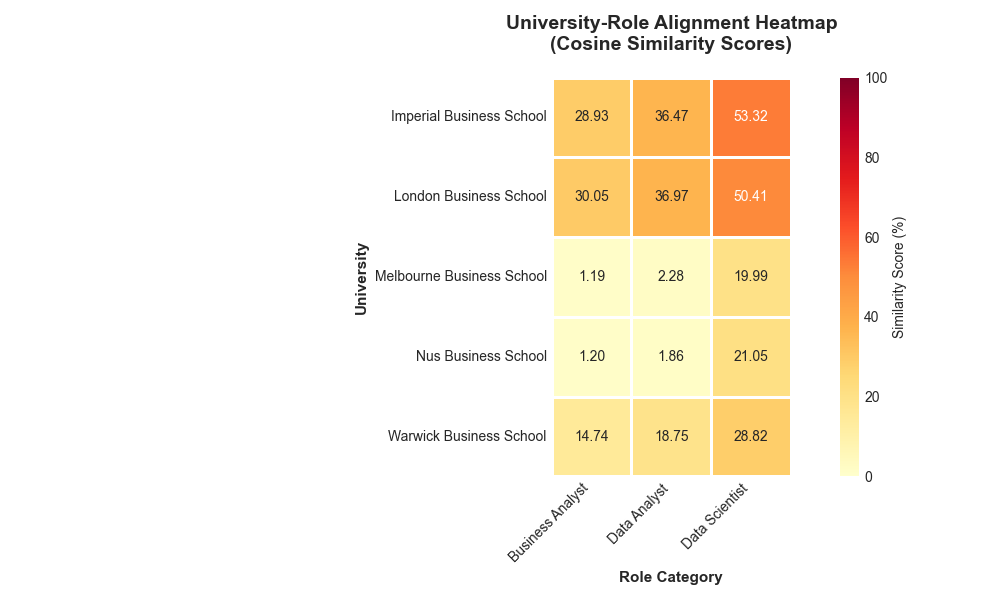

📊 Plot displayed: Similarity Heatmap


BEST UNIVERSITY FOR EACH ROLE

Data Scientist:
  🏆 Imperial Business School
  Score: 53.32%
  Matching Skills: 9

Data Analyst:
  🏆 London Business School
  Score: 36.97%
  Matching Skills: 6

Business Analyst:
  🏆 London Business School
  Score: 30.05%
  Matching Skills: 6



<IPython.core.display.Javascript object>


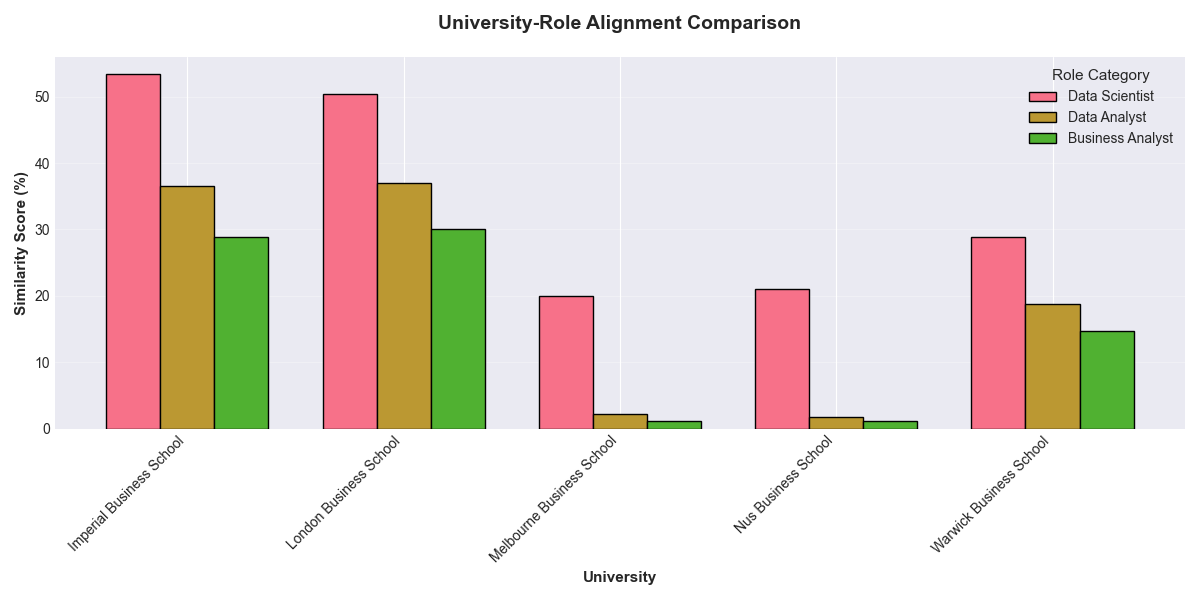

📊 Plot displayed: Similarity Comparison Bars



<IPython.core.display.Javascript object>


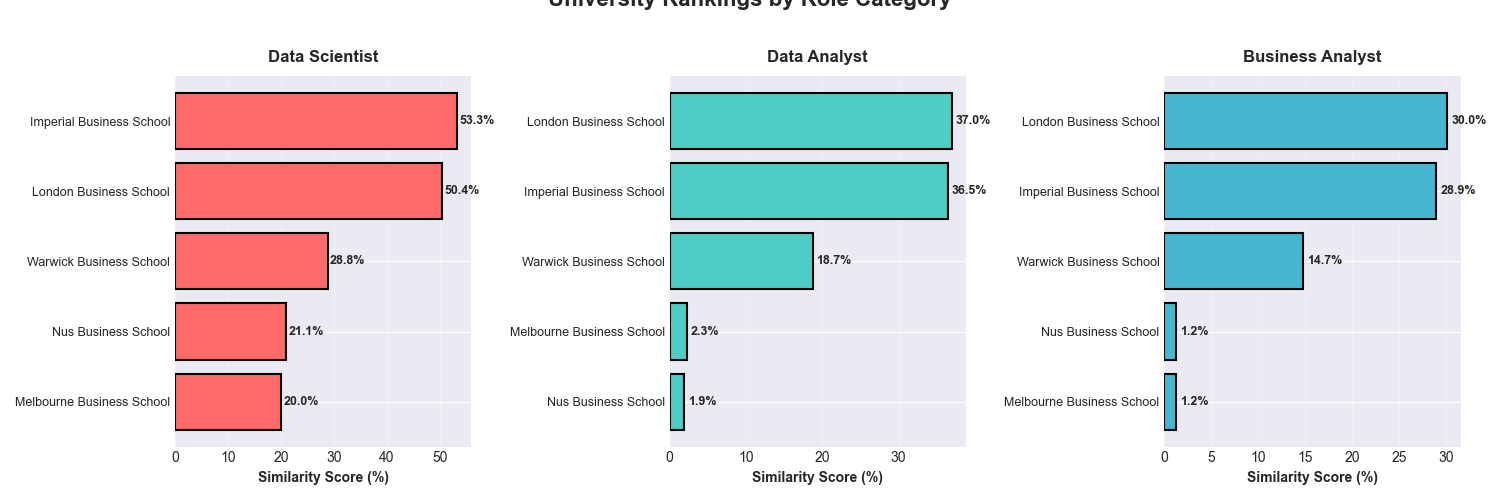

📊 Plot displayed: Rankings by Role


DETAILED SKILLS ANALYSIS


Data Scientist - Top 10 Required Skills:
  • python: 344 job postings
  • machine learning: 309 job postings
  • sql: 245 job postings
  • r: 198 job postings
  • optimization: 121 job postings
  • data visualization: 118 job postings
  • aws: 107 job postings
  • tableau: 95 job postings
  • azure: 80 job postings
  • scikit learn: 80 job postings

  Universities teaching these skills:
    Imperial Business School: 5/10 skills (50.0% coverage)
    London Business School: 5/10 skills (50.0% coverage)
    Melbourne Business School: 1/10 skills (10.0% coverage)
    Nus Business School: 1/10 skills (10.0% coverage)
    Warwick Business School: 2/10 skills (20.0% coverage)


Data Analyst - Top 10 Required Skills:
  • sql: 186 job postings
  • excel: 147 job postings
  • power bi: 139 job postings
  • tableau: 113 job postings
  • data visualization: 98 job postings
  • python: 95 job postings
  • r: 57 job postings
  • optimiz

<IPython.core.display.Javascript object>


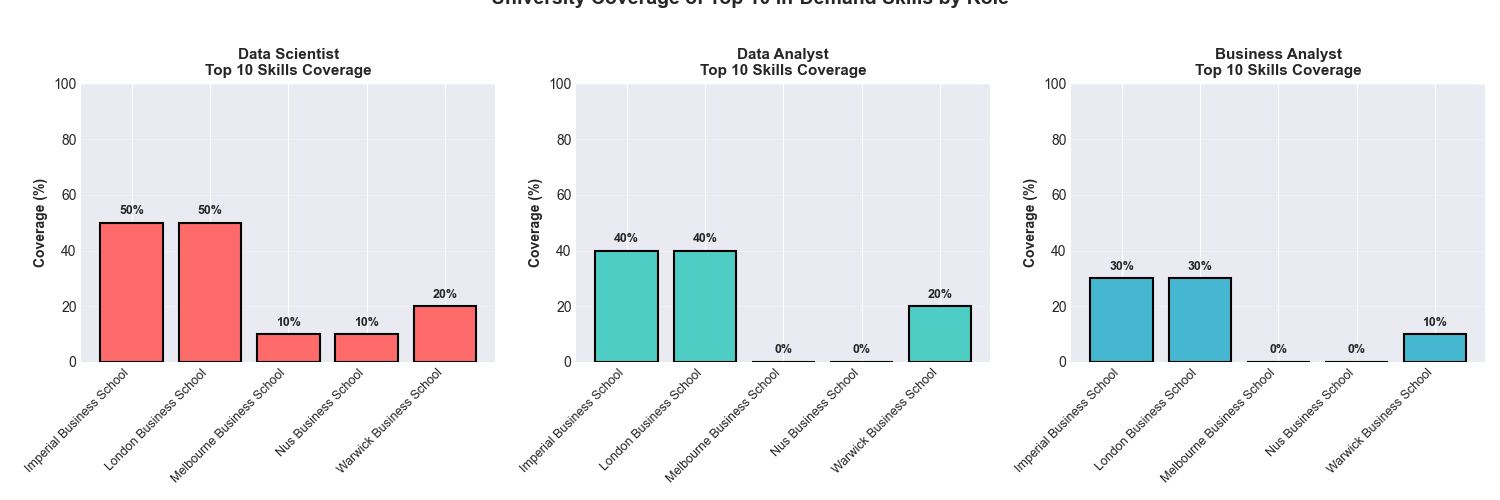

📊 Plot displayed: Skills Coverage Analysis



<IPython.core.display.Javascript object>


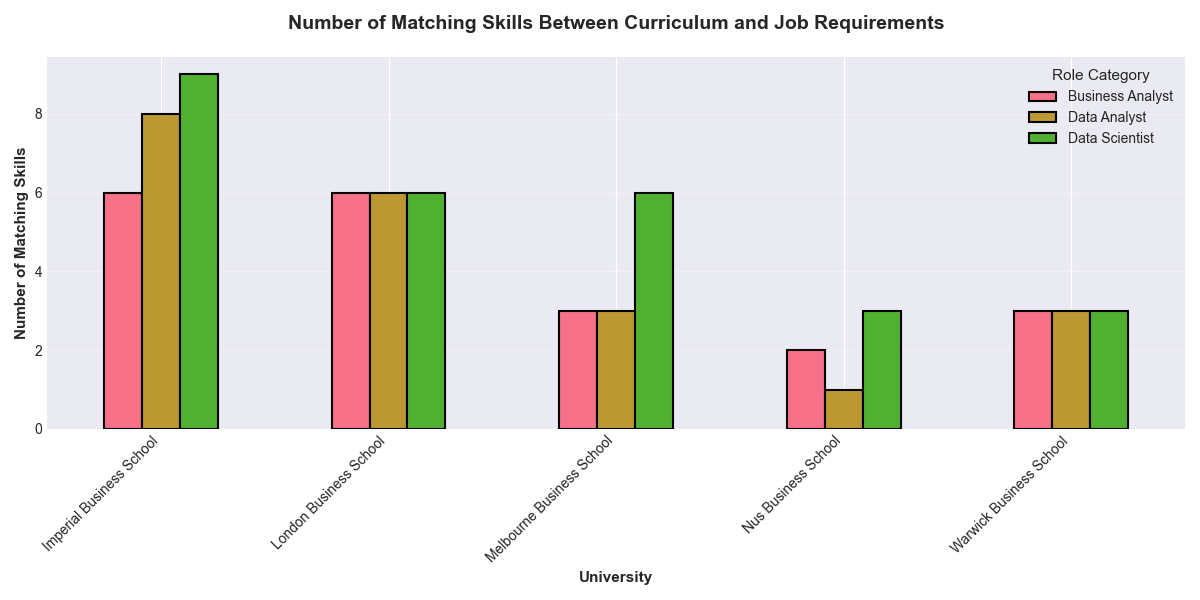

📊 Plot displayed: Matching Skills Comparison



<IPython.core.display.Javascript object>


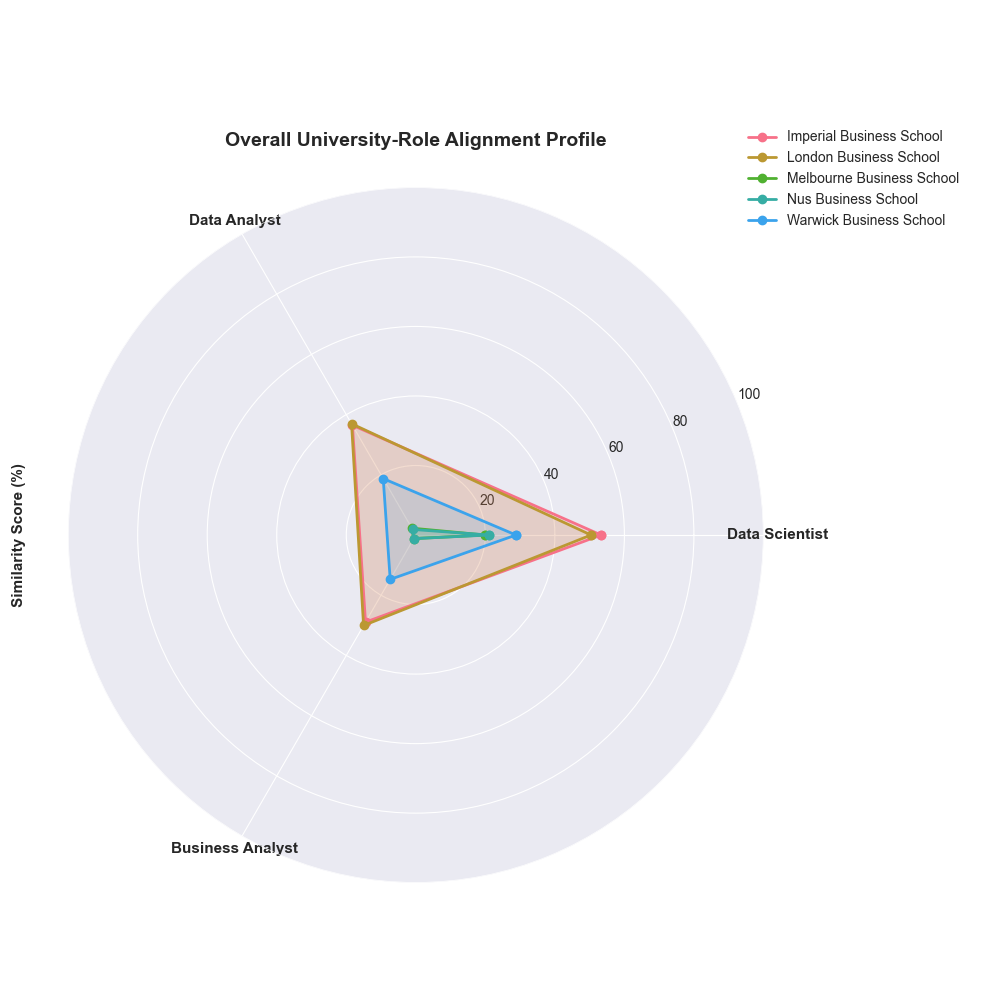

📊 Plot displayed: Alignment Radar Chart


ALL VISUALIZATIONS DISPLAYED!

📊 Displayed plots:
  1. Role Categorization Distribution - Role distribution and unique titles
  2. Similarity Heatmap - Heatmap of all similarity scores
  3. Similarity Comparison Bars - Grouped bar chart comparison
  4. Rankings by Role - Horizontal bar charts showing rankings
  5. Skills Coverage Analysis - Top 10 skills coverage by university
  6. Matching Skills Comparison - Number of matching skills
  7. Alignment Radar Chart - Overall alignment profile radar chart




In [3]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Read the CSV files
curriculum_df = pd.read_csv('skills_from_curriculum_non_us.csv')
job_skills_df = pd.read_csv('step3_job_skills_by_role.csv')

# Function to normalize skill names for better matching
def normalize_skill(skill):
    """Normalize skill names by converting to lowercase and removing special characters"""
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

# Normalize skills in both dataframes
curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# Define role categories with keyword matching patterns
# Keywords are ordered by priority (more specific first)
role_categories = {
    'Data Scientist': ['data scientist', 'ds ', 'data science'],
    'Data Analyst': ['data analyst', 'data analysis'],
    'Business Analyst': ['business analyst', 'business intelligence analyst', 'bi analyst', 'business systems analyst']
}

# Create a category column for job roles using keyword matching
def categorize_role(role):
    """
    Categorize job role based on keyword matching.
    Uses priority-based matching to handle overlapping keywords.
    """
    role_lower = role.lower()
    
    # Check each category's keywords
    for category, keywords in role_categories.items():
        for keyword in keywords:
            if keyword in role_lower:
                return category
    return None

job_skills_df['role_category'] = job_skills_df['role'].apply(categorize_role)

# Print categorization statistics
print("\n" + "="*80)
print("ROLE CATEGORIZATION SUMMARY")
print("="*80 + "\n")

for category in role_categories.keys():
    count = len(job_skills_df[job_skills_df['role_category'] == category])
    unique_roles = job_skills_df[job_skills_df['role_category'] == category]['role'].nunique()
    print(f"{category}:")
    print(f"  • Total records: {count}")
    print(f"  • Unique role titles: {unique_roles}")
    
    # Show sample role titles
    sample_roles = job_skills_df[job_skills_df['role_category'] == category]['role'].unique()[:5]
    print(f"  • Sample roles: {', '.join(sample_roles)}")
    print()

uncategorized = len(job_skills_df[job_skills_df['role_category'].isna()])
print(f"Uncategorized roles: {uncategorized}")
print(f"Total categorized: {len(job_skills_df[job_skills_df['role_category'].notna()])}")
print()

# Plot 1: Role Categorization Distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart for categorization distribution
category_counts = job_skills_df[job_skills_df['role_category'].notna()].groupby('role_category').size()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
ax1.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%', 
        startangle=90, colors=colors, textprops={'fontsize': 11, 'weight': 'bold'})
ax1.set_title('Distribution of Job Roles by Category', fontsize=14, weight='bold', pad=20)

# Bar chart for unique role titles per category
unique_counts = []
for category in role_categories.keys():
    count = job_skills_df[job_skills_df['role_category'] == category]['role'].nunique()
    unique_counts.append(count)

ax2.bar(role_categories.keys(), unique_counts, color=colors, edgecolor='black', linewidth=1.5)
ax2.set_title('Unique Job Titles per Category', fontsize=14, weight='bold', pad=20)
ax2.set_ylabel('Number of Unique Titles', fontsize=11, weight='bold')
ax2.set_xlabel('Role Category', fontsize=11, weight='bold')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(unique_counts):
    ax2.text(i, v + 1, str(v), ha='center', va='bottom', fontsize=10, weight='bold')

plt.tight_layout()
plt.show()
print("📊 Plot displayed: Role Categorization Distribution\n")

# Filter to only keep categorized roles
job_skills_df = job_skills_df[job_skills_df['role_category'].notna()]

# Get all unique skills across both datasets
all_skills = sorted(set(
    list(curriculum_df['skill_normalized'].unique()) + 
    list(job_skills_df['skill_normalized'].unique())
))

# Create university skill vectors
universities = curriculum_df['university'].unique()
university_vectors = {}

for uni in universities:
    uni_skills = curriculum_df[curriculum_df['university'] == uni]
    skill_vector = {}
    for skill in all_skills:
        count = uni_skills[uni_skills['skill_normalized'] == skill]['count'].sum()
        skill_vector[skill] = count
    university_vectors[uni] = skill_vector

# Create job role skill vectors (aggregated by category)
role_vectors = {}

for category in role_categories.keys():
    category_skills = job_skills_df[job_skills_df['role_category'] == category]
    skill_vector = {}
    for skill in all_skills:
        count = category_skills[category_skills['skill_normalized'] == skill]['count'].sum()
        skill_vector[skill] = count
    role_vectors[category] = skill_vector

# Convert dictionaries to matrices for cosine similarity calculation
def dict_to_vector(skill_dict, all_skills):
    """Convert skill dictionary to numpy array"""
    return np.array([skill_dict.get(skill, 0) for skill in all_skills])

# Calculate cosine similarity for each university-role combination
results = []

for role in role_categories.keys():
    role_vector = dict_to_vector(role_vectors[role], all_skills)
    
    print(f"\n{'='*80}")
    print(f"ALIGNMENT ANALYSIS FOR: {role}")
    print(f"{'='*80}\n")
    
    role_similarities = []
    
    for uni in universities:
        uni_vector = dict_to_vector(university_vectors[uni], all_skills)
        
        # Calculate cosine similarity
        similarity = cosine_similarity(
            uni_vector.reshape(1, -1), 
            role_vector.reshape(1, -1)
        )[0][0]
        
        # Find matching skills (both have non-zero values)
        matching_skills = [
            skill for skill in all_skills 
            if university_vectors[uni][skill] > 0 and role_vectors[role][skill] > 0
        ]
        
        # Get top matching skills by job demand
        top_skills = sorted(
            matching_skills,
            key=lambda s: role_vectors[role][s],
            reverse=True
        )[:5]
        
        role_similarities.append({
            'University': uni,
            'Role': role,
            'Similarity_Score': similarity * 100,
            'Matching_Skills_Count': len(matching_skills),
            'Top_Matching_Skills': ', '.join(top_skills) if top_skills else 'None'
        })
    
    # Sort by similarity score
    role_similarities = sorted(
        role_similarities, 
        key=lambda x: x['Similarity_Score'], 
        reverse=True
    )
    
    # Print rankings
    for rank, item in enumerate(role_similarities, 1):
        medal = '🥇' if rank == 1 else '🥈' if rank == 2 else '🥉' if rank == 3 else '  '
        print(f"{medal} Rank {rank}: {item['University']}")
        print(f"   Similarity Score: {item['Similarity_Score']:.2f}%")
        print(f"   Matching Skills: {item['Matching_Skills_Count']}")
        print(f"   Top Skills: {item['Top_Matching_Skills']}")
        print()
    
    results.extend(role_similarities)

# Create comprehensive results dataframe
results_df = pd.DataFrame(results)

# Save to CSV
results_df.to_csv('university_job_alignment_results.csv', index=False)
print(f"\nResults saved to 'university_job_alignment_results.csv'")

# Create summary pivot table
print(f"\n{'='*80}")
print("SUMMARY: Alignment Scores by University and Role")
print(f"{'='*80}\n")

pivot_table = results_df.pivot_table(
    values='Similarity_Score',
    index='University',
    columns='Role',
    aggfunc='first'
).round(2)

print(pivot_table)

# Plot 2: Heatmap of Similarity Scores
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='.2f', cmap='YlOrRd', 
            cbar_kws={'label': 'Similarity Score (%)'}, 
            linewidths=2, linecolor='white',
            square=True, vmin=0, vmax=100)
plt.title('University-Role Alignment Heatmap\n(Cosine Similarity Scores)', 
          fontsize=14, weight='bold', pad=20)
plt.xlabel('Role Category', fontsize=11, weight='bold')
plt.ylabel('University', fontsize=11, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Similarity Heatmap\n")

# Find best university for each role
print(f"\n{'='*80}")
print("BEST UNIVERSITY FOR EACH ROLE")
print(f"{'='*80}\n")

for role in role_categories.keys():
    best = results_df[results_df['Role'] == role].sort_values(
        'Similarity_Score', 
        ascending=False
    ).iloc[0]
    print(f"{role}:")
    print(f"  🏆 {best['University']}")
    print(f"  Score: {best['Similarity_Score']:.2f}%")
    print(f"  Matching Skills: {best['Matching_Skills_Count']}")
    print()

# Plot 3: Grouped Bar Chart - Similarity Scores by Role
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(universities))
width = 0.25

for i, role in enumerate(role_categories.keys()):
    scores = [results_df[(results_df['University'] == uni) & 
                         (results_df['Role'] == role)]['Similarity_Score'].values[0] 
              for uni in universities]
    ax.bar(x + i*width, scores, width, label=role, edgecolor='black', linewidth=1)

ax.set_xlabel('University', fontsize=11, weight='bold')
ax.set_ylabel('Similarity Score (%)', fontsize=11, weight='bold')
ax.set_title('University-Role Alignment Comparison', fontsize=14, weight='bold', pad=20)
ax.set_xticks(x + width)
ax.set_xticklabels([uni.split('(')[0].strip() for uni in universities], rotation=45, ha='right')
ax.legend(title='Role Category', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Similarity Comparison Bars\n")

# Plot 4: Best University for Each Role (Visual Summary)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
colors_role = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for idx, (role, color) in enumerate(zip(role_categories.keys(), colors_role)):
    role_data = results_df[results_df['Role'] == role].sort_values('Similarity_Score', ascending=True)
    
    axes[idx].barh(range(len(role_data)), role_data['Similarity_Score'], 
                   color=color, edgecolor='black', linewidth=1.5)
    axes[idx].set_yticks(range(len(role_data)))
    axes[idx].set_yticklabels([uni.split('(')[0].strip() for uni in role_data['University']], fontsize=9)
    axes[idx].set_xlabel('Similarity Score (%)', fontsize=10, weight='bold')
    axes[idx].set_title(f'{role}', fontsize=12, weight='bold', pad=10)
    axes[idx].grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(role_data['Similarity_Score']):
        axes[idx].text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=9, weight='bold')

plt.suptitle('University Rankings by Role Category', fontsize=16, weight='bold', y=1.02)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Rankings by Role\n")

# Create a detailed skills comparison
print(f"\n{'='*80}")
print("DETAILED SKILLS ANALYSIS")
print(f"{'='*80}\n")

for role in role_categories.keys():
    print(f"\n{role} - Top 10 Required Skills:")
    role_skills = sorted(
        [(skill, role_vectors[role][skill]) for skill in all_skills if role_vectors[role][skill] > 0],
        key=lambda x: x[1],
        reverse=True
    )[:10]
    
    for skill, count in role_skills:
        print(f"  • {skill}: {count} job postings")
    
    # Show which universities teach these top skills
    print(f"\n  Universities teaching these skills:")
    for uni in universities:
        taught_count = sum(1 for skill, _ in role_skills if university_vectors[uni][skill] > 0)
        coverage = (taught_count / len(role_skills)) * 100
        print(f"    {uni}: {taught_count}/{len(role_skills)} skills ({coverage:.1f}% coverage)")
    print()

# Plot 5: Skills Coverage Analysis
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx, role in enumerate(role_categories.keys()):
    # Get top 10 skills for this role
    role_skills = sorted(
        [(skill, role_vectors[role][skill]) for skill in all_skills if role_vectors[role][skill] > 0],
        key=lambda x: x[1],
        reverse=True
    )[:10]
    
    # Calculate coverage for each university
    coverage_data = []
    for uni in universities:
        taught_count = sum(1 for skill, _ in role_skills if university_vectors[uni][skill] > 0)
        coverage_pct = (taught_count / len(role_skills)) * 100
        coverage_data.append(coverage_pct)
    
    axes[idx].bar(range(len(universities)), coverage_data, 
                  color=colors_role[idx], edgecolor='black', linewidth=1.5)
    axes[idx].set_xticks(range(len(universities)))
    axes[idx].set_xticklabels([uni.split('(')[0].strip() for uni in universities], 
                               rotation=45, ha='right', fontsize=9)
    axes[idx].set_ylabel('Coverage (%)', fontsize=10, weight='bold')
    axes[idx].set_title(f'{role}\nTop 10 Skills Coverage', fontsize=11, weight='bold')
    axes[idx].set_ylim(0, 100)
    axes[idx].grid(axis='y', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(coverage_data):
        axes[idx].text(i, v + 2, f'{v:.0f}%', ha='center', va='bottom', fontsize=9, weight='bold')

plt.suptitle('University Coverage of Top 10 In-Demand Skills by Role', 
             fontsize=14, weight='bold', y=1.02)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Skills Coverage Analysis\n")

# Plot 6: Matching Skills Count Comparison
fig, ax = plt.subplots(figsize=(12, 6))
matching_pivot = results_df.pivot_table(
    values='Matching_Skills_Count',
    index='University',
    columns='Role',
    aggfunc='first'
)

matching_pivot.plot(kind='bar', ax=ax, edgecolor='black', linewidth=1.5)
ax.set_xlabel('University', fontsize=11, weight='bold')
ax.set_ylabel('Number of Matching Skills', fontsize=11, weight='bold')
ax.set_title('Number of Matching Skills Between Curriculum and Job Requirements', 
             fontsize=14, weight='bold', pad=20)
ax.set_xticklabels([uni.split('(')[0].strip() for uni in matching_pivot.index], 
                    rotation=45, ha='right')
ax.legend(title='Role Category', fontsize=10, title_fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Matching Skills Comparison\n")

# Plot 7: Radar Chart for Overall Alignment
from math import pi

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = [n / float(len(role_categories)) * 2 * pi for n in range(len(role_categories))]
angles += angles[:1]

for uni in universities:
    values = []
    for role in role_categories.keys():
        score = results_df[(results_df['University'] == uni) & 
                          (results_df['Role'] == role)]['Similarity_Score'].values[0]
        values.append(score)
    values += values[:1]
    
    ax.plot(angles, values, 'o-', linewidth=2, label=uni.split('(')[0].strip())
    ax.fill(angles, values, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(role_categories.keys(), fontsize=11, weight='bold')
ax.set_ylim(0, 100)
ax.set_ylabel('Similarity Score (%)', fontsize=11, weight='bold', labelpad=30)
ax.set_title('Overall University-Role Alignment Profile', 
             fontsize=14, weight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=10)
ax.grid(True)
plt.tight_layout()
plt.show()
print("📊 Plot displayed: Alignment Radar Chart\n")

print("\n" + "="*80)
print("ALL VISUALIZATIONS DISPLAYED!")
print("="*80)
print("\n📊 Displayed plots:")
print("  1. Role Categorization Distribution - Role distribution and unique titles")
print("  2. Similarity Heatmap - Heatmap of all similarity scores")
print("  3. Similarity Comparison Bars - Grouped bar chart comparison")
print("  4. Rankings by Role - Horizontal bar charts showing rankings")
print("  5. Skills Coverage Analysis - Top 10 skills coverage by university")
print("  6. Matching Skills Comparison - Number of matching skills")
print("  7. Alignment Radar Chart - Overall alignment profile radar chart")
print("\n")

✅ Data Scientist skills collected: 62
✅ Data Analyst skills collected: 45
✅ Business Analyst skills collected: 30

=== Curriculum vs Data Scientist Skill Alignment ===
                  University  Similarity_with_Data_Scientist
0   Imperial Business School                        0.295122
2  Melbourne Business School                        0.219971
1     London Business School                        0.203653
4    Warwick Business School                        0.155543
3        Nus Business School                        0.134704
✅ Saved as 'Data_Scientist_Curriculum_Alignment.csv'

=== Curriculum vs Data Analyst Skill Alignment ===
                  University  Similarity_with_Data_Analyst
0   Imperial Business School                      0.307920
1     London Business School                      0.239046
4    Warwick Business School                      0.182574
2  Melbourne Business School                      0.129099
3        Nus Business School                      0.052705
✅ Saved

<IPython.core.display.Javascript object>


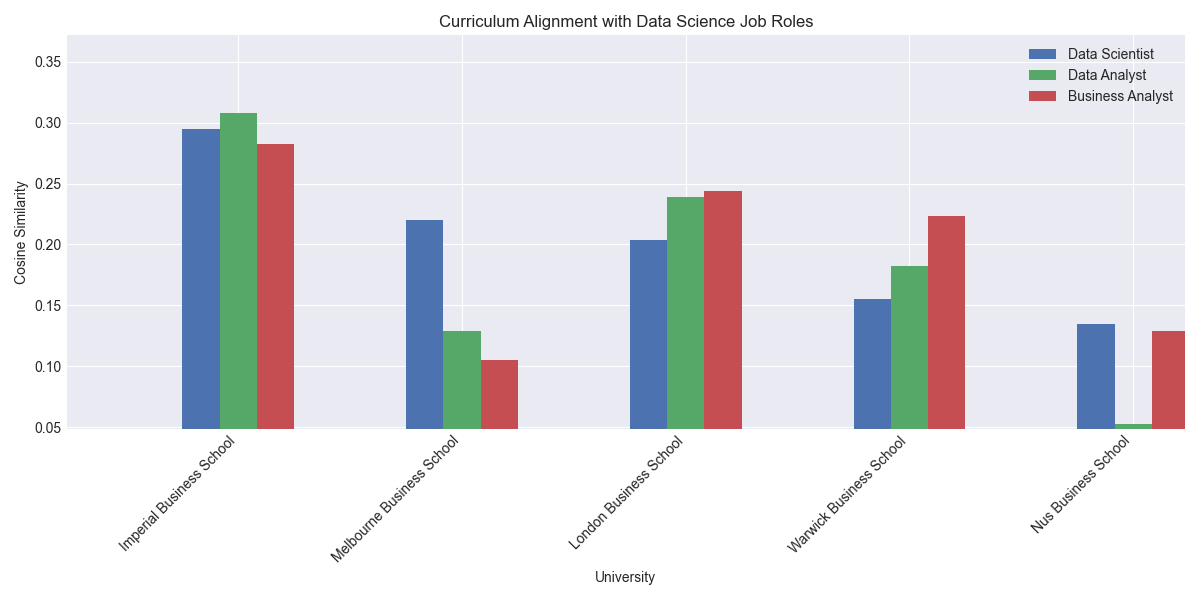

In [4]:
# --- Curriculum vs Job Skill Alignment for All Roles ---

import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Load data ---
curriculum_df = pd.read_csv('skills_from_curriculum_non_us.csv')
job_skills_df = pd.read_csv('step3_job_skills_by_role.csv')

# --- 1️⃣ Normalize skill names ---
def normalize_skill(skill):
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9\s]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# --- 2️⃣ Function to get filtered job skills for a role ---
def get_role_skills(df, role_name):
    role_name_lower = role_name.lower()
    if 'role_category' in df.columns:
        role_df = df[df['role_category'].str.lower() == role_name_lower]
    else:
        role_df = df[df['role'].str.lower().str.contains(role_name_lower, na=False)]
    
    skills = role_df['skill_normalized'].dropna().unique().tolist()
    return list(set(skills))  # remove duplicates

# --- 3️⃣ Extract skills for each role ---
data_scientist_skills = get_role_skills(job_skills_df, 'Data Scientist')
data_analyst_skills = get_role_skills(job_skills_df, 'Data Analyst')
business_analyst_skills = get_role_skills(job_skills_df, 'Business Analyst')

print(f"✅ Data Scientist skills collected: {len(data_scientist_skills)}")
print(f"✅ Data Analyst skills collected: {len(data_analyst_skills)}")
print(f"✅ Business Analyst skills collected: {len(business_analyst_skills)}")

# --- 4️⃣ Create combined vocabulary ---
all_skills = sorted(set(
    list(curriculum_df['skill_normalized'].unique()) +
    data_scientist_skills + data_analyst_skills + business_analyst_skills
))

# --- 5️⃣ Build curriculum vectors for universities ---
universities = curriculum_df['university'].unique()
university_vectors = {}

for uni in universities:
    uni_skills = curriculum_df[curriculum_df['university'] == uni]['skill_normalized'].tolist()
    uni_vector = np.array([1 if skill in uni_skills else 0 for skill in all_skills])
    university_vectors[uni] = uni_vector

# --- 6️⃣ Function to compute similarity for a given role ---
def compute_similarity(role_skills, role_name):
    role_vector = np.array([1 if skill in role_skills else 0 for skill in all_skills])
    
    scores = {}
    for uni, uni_vector in university_vectors.items():
        sim = cosine_similarity([uni_vector], [role_vector])[0][0]
        scores[uni] = sim

    df = pd.DataFrame(list(scores.items()), columns=['University', f'Similarity_with_{role_name.replace(" ", "_")}'])
    df = df.sort_values(by=df.columns[1], ascending=False)
    
    # Save to CSV
    csv_name = f"{role_name.replace(' ', '_')}_Curriculum_Alignment.csv"
    df.to_csv(csv_name, index=False)
    
    print(f"\n=== Curriculum vs {role_name} Skill Alignment ===")
    print(df)
    print(f"✅ Saved as '{csv_name}'")
    
    return df

# --- 7️⃣ Run for all three roles ---
df_ds = compute_similarity(data_scientist_skills, 'Data Scientist')
df_da = compute_similarity(data_analyst_skills, 'Data Analyst')
df_ba = compute_similarity(business_analyst_skills, 'Business Analyst')

# --- 8️⃣ Combine for summary ---
summary_df = df_ds.merge(df_da, on='University').merge(df_ba, on='University')
summary_df.to_csv("AllRoles_Curriculum_Alignment.csv", index=False)

print("\n✅ Combined alignment saved as 'AllRoles_Curriculum_Alignment.csv'")

# --- 9️⃣ Optional Visualization ---
summary_df.plot(
    x='University', 
    kind='bar', 
    figsize=(12,6),
    title='Curriculum Alignment with Data Science Job Roles',
    color=['#4C72B0', '#55A868', '#C44E52']
)
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.legend(['Data Scientist', 'Data Analyst', 'Business Analyst'])
plt.tight_layout()
plt.show()



=== Composite Employability Index (Higher = Better Alignment) ===
                  University  Avg_Similarity  Coverage_Ratio  Weighted_Match  \
0   Imperial Business School        0.295295        0.138462        0.363206   
2     London Business School        0.228891        0.092308        0.335060   
3    Warwick Business School        0.187241        0.046154        0.122495   
1  Melbourne Business School        0.151493        0.092308        0.077910   
4        Nus Business School        0.105503        0.046154        0.064175   

   Employability_Index  
0             0.261827  
2             0.209150  
3             0.131966  
1             0.119021  
4             0.079432  

✅ Saved as 'Composite_Employability_Index.csv'


<IPython.core.display.Javascript object>


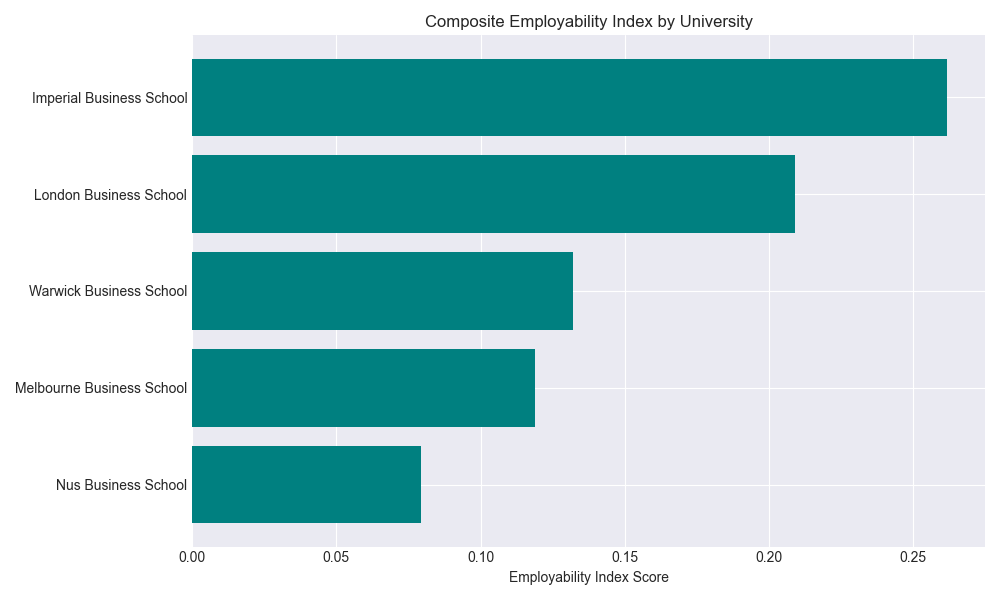

In [5]:
# --- Composite Employability Index Calculation ---

import pandas as pd
import numpy as np

# Load your combined alignment file (already created previously)
alignment_df = pd.read_csv("AllRoles_Curriculum_Alignment.csv")

# Load the curriculum and job skills data again
curriculum_df = pd.read_csv("skills_from_curriculum_non_us.csv")
job_skills_df = pd.read_csv("step3_job_skills_by_role.csv")

# Normalize skill names
import re
def normalize_skill(skill):
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9\s]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# --- Step 1️⃣: Combine all job skills and count frequency ---
skill_demand = job_skills_df['skill_normalized'].value_counts().reset_index()
skill_demand.columns = ['skill', 'count']

# --- Step 2️⃣: Compute Coverage Ratio and Weighted Demand Match ---
universities = curriculum_df['university'].unique()

coverage_data = []

for uni in universities:
    uni_skills = set(curriculum_df[curriculum_df['university'] == uni]['skill_normalized'])
    
    # Total job skills
    total_job_skills = set(skill_demand['skill'])
    
    # Coverage ratio (how many job skills the university teaches)
    coverage_ratio = len(uni_skills.intersection(total_job_skills)) / len(total_job_skills)
    
    # Weighted demand match (how many high-demand skills are covered, weighted by frequency)
    matched_skills = skill_demand[skill_demand['skill'].isin(uni_skills)]
    weighted_match = matched_skills['count'].sum() / skill_demand['count'].sum()
    
    coverage_data.append([uni, coverage_ratio, weighted_match])

coverage_df = pd.DataFrame(coverage_data, columns=['University', 'Coverage_Ratio', 'Weighted_Match'])

# --- Step 3️⃣: Merge with similarity scores ---
merged = alignment_df.merge(coverage_df, on='University', how='left')

# Compute average similarity across all three roles
merged['Avg_Similarity'] = merged[['Similarity_with_Data_Scientist', 
                                   'Similarity_with_Data_Analyst', 
                                   'Similarity_with_Business_Analyst']].mean(axis=1)

# --- Step 4️⃣: Calculate Employability Index ---
merged['Employability_Index'] = (
    0.5 * merged['Avg_Similarity'] +
    0.3 * merged['Coverage_Ratio'] +
    0.2 * merged['Weighted_Match']
)

# --- Step 5️⃣: Sort and Display ---
merged = merged.sort_values('Employability_Index', ascending=False)
print("\n=== Composite Employability Index (Higher = Better Alignment) ===")
print(merged[['University', 'Avg_Similarity', 'Coverage_Ratio', 'Weighted_Match', 'Employability_Index']])

# --- Step 6️⃣: Save to CSV ---
merged.to_csv("Composite_Employability_Index.csv", index=False)
print("\n✅ Saved as 'Composite_Employability_Index.csv'")

# --- Step 7️⃣: Visualization ---
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(merged['University'], merged['Employability_Index'], color='teal')
plt.xlabel("Employability Index Score")
plt.title("Composite Employability Index by University")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


# Top 10 US universities 

✅ Data Scientist skills collected: 62
✅ Data Analyst skills collected: 45
✅ Business Analyst skills collected: 30

=== Curriculum vs Data Scientist Skill Alignment ===
                                      University  \
0            Carnegie Mellon University (Tepper)   
5                    New York University (Stern)   
9              University Of Washington (Foster)   
4         Minnesota Carlson School Of Management   
1                            Columbia University   
2                          Georgetown University   
8        University Of Texas Of Austin (Mccombs)   
6                    Purdue University (Kranert)   
3  Massachusetts Institute Of Technology (Sloan)   
7   University Of Southern California (Marshall)   

   Similarity_with_Data_Scientist  
0                        0.388857  
5                        0.355600  
9                        0.349250  
4                        0.336011  
1                        0.320494  
2                        0.312379  
8      

<IPython.core.display.Javascript object>


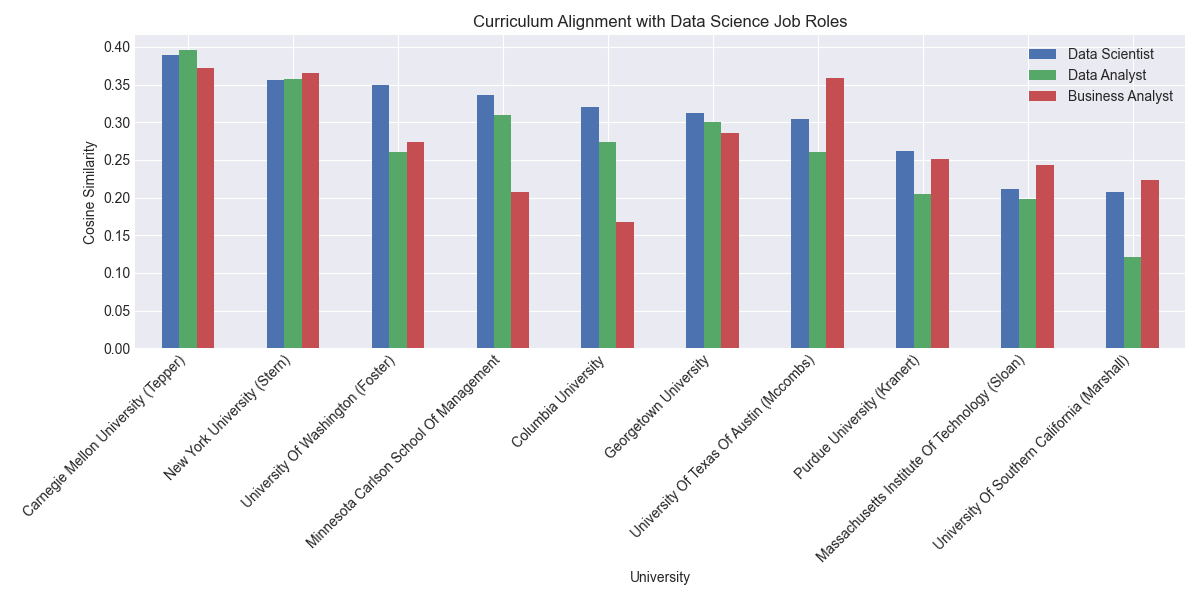

In [6]:
# --- Curriculum vs Job Skill Alignment for All Roles ---

import pandas as pd
import numpy as np
import re
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# --- Load data ---
curriculum_df = pd.read_csv('skills_from_curriculum (1).csv')
job_skills_df = pd.read_csv('step3_job_skills_by_role.csv')

# --- 1️⃣ Normalize skill names ---
def normalize_skill(skill):
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9\s]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# --- 2️⃣ Function to get filtered job skills for a role ---
def get_role_skills(df, role_name):
    role_name_lower = role_name.lower()
    if 'role_category' in df.columns:
        role_df = df[df['role_category'].str.lower() == role_name_lower]
    else:
        role_df = df[df['role'].str.lower().str.contains(role_name_lower, na=False)]
    
    skills = role_df['skill_normalized'].dropna().unique().tolist()
    return list(set(skills))  # remove duplicates

# --- 3️⃣ Extract skills for each role ---
data_scientist_skills = get_role_skills(job_skills_df, 'Data Scientist')
data_analyst_skills = get_role_skills(job_skills_df, 'Data Analyst')
business_analyst_skills = get_role_skills(job_skills_df, 'Business Analyst')

print(f"✅ Data Scientist skills collected: {len(data_scientist_skills)}")
print(f"✅ Data Analyst skills collected: {len(data_analyst_skills)}")
print(f"✅ Business Analyst skills collected: {len(business_analyst_skills)}")

# --- 4️⃣ Create combined vocabulary ---
all_skills = sorted(set(
    list(curriculum_df['skill_normalized'].unique()) +
    data_scientist_skills + data_analyst_skills + business_analyst_skills
))

# --- 5️⃣ Build curriculum vectors for universities ---
universities = curriculum_df['university'].unique()
university_vectors = {}

for uni in universities:
    uni_skills = curriculum_df[curriculum_df['university'] == uni]['skill_normalized'].tolist()
    uni_vector = np.array([1 if skill in uni_skills else 0 for skill in all_skills])
    university_vectors[uni] = uni_vector

# --- 6️⃣ Function to compute similarity for a given role ---
def compute_similarity(role_skills, role_name):
    role_vector = np.array([1 if skill in role_skills else 0 for skill in all_skills])
    
    scores = {}
    for uni, uni_vector in university_vectors.items():
        sim = cosine_similarity([uni_vector], [role_vector])[0][0]
        scores[uni] = sim

    df = pd.DataFrame(list(scores.items()), columns=['University', f'Similarity_with_{role_name.replace(" ", "_")}'])
    df = df.sort_values(by=df.columns[1], ascending=False)
    
    # Save to CSV
    csv_name = f"{role_name.replace(' ', '_')}_Curriculum_Alignment.csv"
    df.to_csv(csv_name, index=False)
    
    print(f"\n=== Curriculum vs {role_name} Skill Alignment ===")
    print(df)
    print(f"✅ Saved as '{csv_name}'")
    
    return df

# --- 7️⃣ Run for all three roles ---
df_ds = compute_similarity(data_scientist_skills, 'Data Scientist')
df_da = compute_similarity(data_analyst_skills, 'Data Analyst')
df_ba = compute_similarity(business_analyst_skills, 'Business Analyst')

# --- 8️⃣ Combine for summary ---
summary_df = df_ds.merge(df_da, on='University').merge(df_ba, on='University')
summary_df.to_csv("AllRoles_Curriculum_Alignment.csv", index=False)

print("\n✅ Combined alignment saved as 'AllRoles_Curriculum_Alignment.csv'")

# --- 9️⃣ Optional Visualization ---
summary_df.plot(
    x='University', 
    kind='bar', 
    figsize=(12,6),
    title='Curriculum Alignment with Data Science Job Roles',
    color=['#4C72B0', '#55A868', '#C44E52']
)
plt.ylabel('Cosine Similarity')
plt.xticks(rotation=45, ha='right')
plt.legend(['Data Scientist', 'Data Analyst', 'Business Analyst'])
plt.tight_layout()
plt.show()



=== Composite Employability Index (Higher = Better Alignment) ===
                                      University  Avg_Similarity  \
1                    New York University (Stern)        0.359507   
0            Carnegie Mellon University (Tepper)        0.385704   
5                          Georgetown University        0.299384   
2              University Of Washington (Foster)        0.294662   
6        University Of Texas Of Austin (Mccombs)        0.307886   
3         Minnesota Carlson School Of Management        0.284307   
7                    Purdue University (Kranert)        0.239577   
4                            Columbia University        0.253877   
8  Massachusetts Institute Of Technology (Sloan)        0.217954   
9   University Of Southern California (Marshall)        0.184238   

   Coverage_Ratio  Weighted_Match  Employability_Index  
1        0.215385        0.498311             0.344031  
0        0.230769        0.404639             0.343011  
5        0.16

<IPython.core.display.Javascript object>


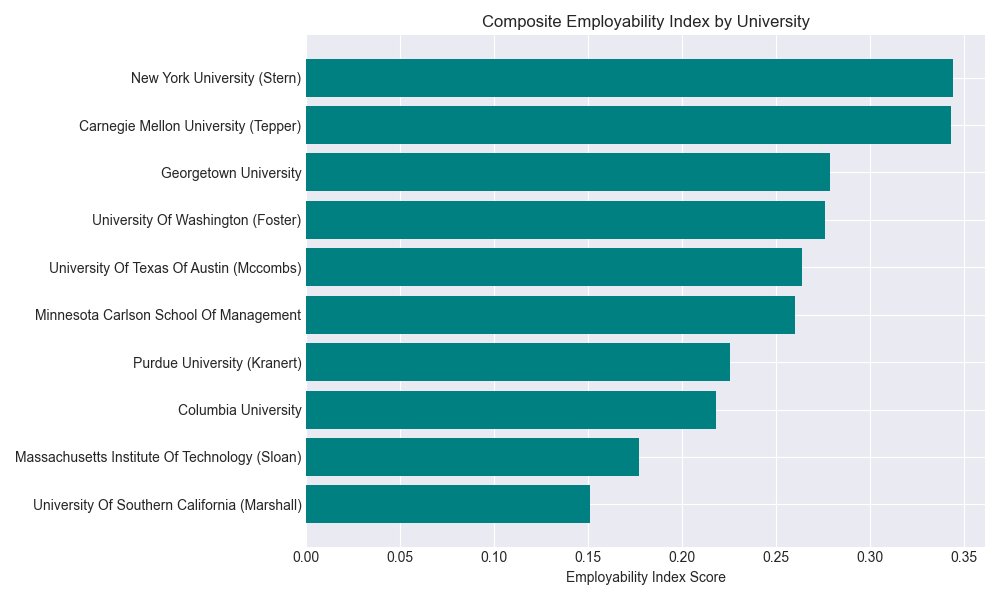

In [10]:
# --- Composite Employability Index Calculation ---

import pandas as pd
import numpy as np

# Load your combined alignment file (already created previously)
alignment_df = pd.read_csv("AllRoles_Curriculum_Alignment.csv")

# Load the curriculum and job skills data again
curriculum_df = pd.read_csv("skills_from_curriculum (1).csv")
job_skills_df = pd.read_csv("step3_job_skills_by_role.csv")

# Normalize skill names
import re
def normalize_skill(skill):
    skill = str(skill).lower()
    skill = re.sub(r'[^a-z0-9\s]', ' ', skill)
    skill = re.sub(r'\s+', ' ', skill)
    return skill.strip()

curriculum_df['skill_normalized'] = curriculum_df['skill'].apply(normalize_skill)
job_skills_df['skill_normalized'] = job_skills_df['job_skills'].apply(normalize_skill)

# --- Step 1️⃣: Combine all job skills and count frequency ---
skill_demand = job_skills_df['skill_normalized'].value_counts().reset_index()
skill_demand.columns = ['skill', 'count']

# --- Step 2️⃣: Compute Coverage Ratio and Weighted Demand Match ---
universities = curriculum_df['university'].unique()

coverage_data = []

for uni in universities:
    uni_skills = set(curriculum_df[curriculum_df['university'] == uni]['skill_normalized'])
    
    # Total job skills
    total_job_skills = set(skill_demand['skill'])
    
    # Coverage ratio (how many job skills the university teaches)
    coverage_ratio = len(uni_skills.intersection(total_job_skills)) / len(total_job_skills)
    
    # Weighted demand match (how many high-demand skills are covered, weighted by frequency)
    matched_skills = skill_demand[skill_demand['skill'].isin(uni_skills)]
    weighted_match = matched_skills['count'].sum() / skill_demand['count'].sum()
    
    coverage_data.append([uni, coverage_ratio, weighted_match])

coverage_df = pd.DataFrame(coverage_data, columns=['University', 'Coverage_Ratio', 'Weighted_Match'])

# --- Step 3️⃣: Merge with similarity scores ---
merged = alignment_df.merge(coverage_df, on='University', how='left')

# Compute average similarity across all three roles
merged['Avg_Similarity'] = merged[['Similarity_with_Data_Scientist', 
                                   'Similarity_with_Data_Analyst', 
                                   'Similarity_with_Business_Analyst']].mean(axis=1)

# --- Step 4️⃣: Calculate Employability Index ---
merged['Employability_Index'] = (
    0.5 * merged['Avg_Similarity'] +
    0.3 * merged['Coverage_Ratio'] +
    0.2 * merged['Weighted_Match']
)

# --- Step 5️⃣: Sort and Display ---
merged = merged.sort_values('Employability_Index', ascending=False)
print("\n=== Composite Employability Index (Higher = Better Alignment) ===")
print(merged[['University', 'Avg_Similarity', 'Coverage_Ratio', 'Weighted_Match', 'Employability_Index']])

# --- Step 6️⃣: Save to CSV ---
merged.to_csv("Composite_Employability_Index.csv", index=False)
print("\n✅ Saved as 'Composite_Employability_Index.csv'")

# --- Step 7️⃣: Visualization ---
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(merged['University'], merged['Employability_Index'], color='teal')
plt.xlabel("Employability Index Score")
plt.title("Composite Employability Index by University")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
